# NGC 6441 Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
import analysis_routines
import variables
import glob
import re
from astropy.stats import sigma_clip
%matplotlib inline 

In [2]:
target = 'NGC6441'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '17:50:12.84'
cluster_dec = '-37:03:03.9'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

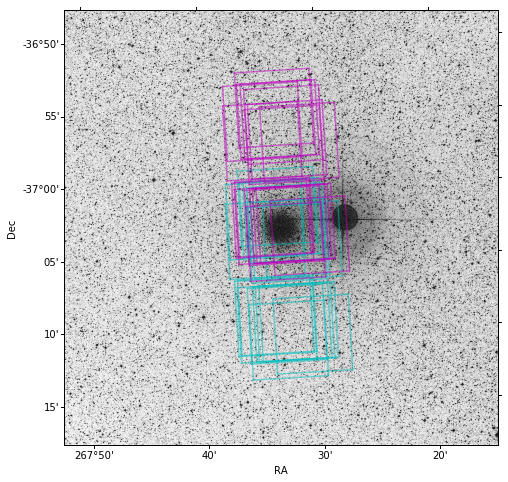

In [4]:
from matplotlib.colors import LogNorm
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC6441...
Finished reading optical catalog.


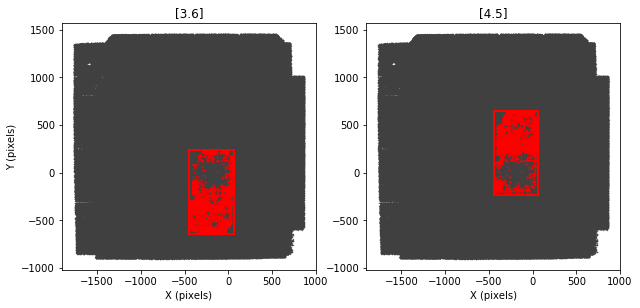

In [5]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'DeepMosaic/I1-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'DeepMosaic/I2-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymin']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymax'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmin']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmax'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('[3.6]')
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymin']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymax'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmin']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmax'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.set_xlabel('X (pixels)')
ax2.set_title('[4.5]')


# Add transformed catalogs
I1ids, I1x, I1y, I1mag, I1err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I1_deep_dn.alf')
I2ids, I2x, I2y, I2mag, I2err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I2_deep_dn.alf')

filesI1, x_offI1, y_offI1, transformI1, dofI1 = read_dao.read_mch(folder+'DeepMosaic/op-I1-deep.mch')
filesI2, x_offI2, y_offI2, transformI2, dofI2 = read_dao.read_mch(folder+'DeepMosaic/op-I2-deep.mch')

xI1 = float(x_offI1[1])+float(transformI1[1][0])*I1x+float(transformI1[1][1])*I1y
yI1 = float(y_offI1[1])+float(transformI1[1][2])*I1x+float(transformI1[1][3])*I1y
xI2 = float(x_offI2[1])+float(transformI2[1][0])*I2x+float(transformI2[1][1])*I2y
yI2 = float(y_offI2[1])+float(transformI2[1][2])*I2x+float(transformI2[1][3])*I2y

ax1.plot(xI1, yI1, '.', markersize=1.8, color='r')
ax2.plot(xI2, yI2, '.', markersize=1.8, color='r')


mp.show()

# Calibration

In [3]:
calibration.find_lst_stars(target, 'I1', data_dir=folder)
calibration.find_lst_stars(target, 'I2', data_dir=folder)

[477673] [477112 477374 477673 481080]
[480563] [480563 481259 480078 482303 476209]
[486851] [486851]
[488455] [488455 489645 491988 491008 487391 487923]
[491593] [491593 489948 489382 492771 492493 493274]
[511634] [511634 514450 513841]
[510598] [510598]
[512082] [510790 510075 512082 513289 511841]
[509410] [509022 509410]
[521678] []
[517657] [517657 515435]
[525352] [525352 523590 523461 525208]
[518765] [518765]
[524330] [524330]
[529235] [529235 531237 527055]
[531403] [531403 529162]
[532973] [532973 536398 536186]
[539673] [539673 539196 541524 539447 538336 537515 539492]
[534067] [534067 534050 533970]
[541815] [541815 539057 540089]
[545918] [545918 546693 543756]
[553899] [555237 553899 551263]
[556605] [558761 557169 557555 559132 557990 556605 558222 559122 559733 555786
 556162 554414]
[564710] [568088 565607 565249 564710 563762]
[564126] [564126 561899]
[571721] [571721 573671]
[575890] [576892 575890 576432 576967]
[597934] []
[592556] [592556 591514]
[604203] [604

In [4]:
calibration.do_ap_phot(target, 'I1', 12, data_dir=folder, dao_dir='/usr/local/phot/')
calibration.do_ap_phot(target, 'I2', 12, data_dir=folder, dao_dir='/usr/local/phot/')


  READ NOISE (ADU; 1 frame) =     4.10        GAIN (e-/ADU; 1 frame) =     3.70
 LOW GOOD DATUM (in sigmas) =    10.00      HIGH GOOD DATUM (in ADU) = 30000.00
             FWHM OF OBJECT =     2.00         THRESHOLD (in sigmas) =     6.00
  LS (LOW SHARPNESS CUTOFF) =     0.30    HS (HIGH SHARPNESS CUTOFF) =     1.40
  LR (LOW ROUNDNESS CUTOFF) =    -1.00    HR (HIGH ROUNDNESS CUTOFF) =     1.00
             WATCH PROGRESS =    -1.00                FITTING RADIUS =     2.00
                 PSF RADIUS =     9.00                  VARIABLE PSF =     0.00
              SKY ESTIMATOR =     0.00            ANALYTIC MODEL PSF =     2.00
  EXTRA PSF CLEANING PASSES =     5.00       USE SATURATED PSF STARS =     0.00
       PERCENT ERROR (in %) =     0.75          PROFILE ERROR (in %) =     5.00

 Command: at NGC6441:I1_46721536_01.fits
at NGC6441:I1_46721536_01.fits

     NGC6441:I1_46721536_01...               


                                      Picture size:    256   256


 Command: 

 PHO> 


 Input position file (default 
                       NGC6441:I1_46721536_08.coo): 

   Output file (default NGC6441:I1_46721536_08.ap): 


 Command: at NGC6441:I1_46721536_09.fits
at NGC6441:I1_46721536_09.fits

     NGC6441:I1_46721536_09...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46722048_07.coo): 

   Output file (default NGC6441:I1_46722048_07.ap): 


 Command: at NGC6441:I1_46722048_08.fits
at NGC6441:I1_46722048_08.fits

     NGC6441:I1_46722048_08...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46722560_06.coo): 

   Output file (default NGC6441:I1_46722560_06.ap): 


 Command: at NGC6441:I1_46722560_07.fits
at NGC6441:I1_46722560_07.fits

     NGC6441:I1_46722560_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46723072_05.coo): 

   Output file (default NGC6441:I1_46723072_05.ap): 


 Command: at NGC6441:I1_46723072_06.fits
at NGC6441:I1_46723072_06.fits

     NGC6441:I1_46723072_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46723584_04.coo): 

   Output file (default NGC6441:I1_46723584_04.ap): 


 Command: at NGC6441:I1_46723584_05.fits
at NGC6441:I1_46723584_05.fits

     NGC6441:I1_46723584_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46724352_03.coo): 

   Output file (default NGC6441:I1_46724352_03.ap): 


 Command: at NGC6441:I1_46724352_04.fits
at NGC6441:I1_46724352_04.fits

     NGC6441:I1_46724352_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46725376_02.coo): 

   Output file (default NGC6441:I1_46725376_02.ap): 


 Command: at NGC6441:I1_46725376_03.fits
at NGC6441:I1_46725376_03.fits

     NGC6441:I1_46725376_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46726400_01.coo): 

   Output file (default NGC6441:I1_46726400_01.ap): 


 Command: at NGC6441:I1_46726400_02.fits
at NGC6441:I1_46726400_02.fits

     NGC6441:I1_46726400_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46726400_18.coo): 

   Output file (default NGC6441:I1_46726400_18.ap): 


 Command: at NGC6441:I1_46727168_01.fits
at NGC6441:I1_46727168_01.fits

     NGC6441:I1_46727168_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46727168_17.coo): 

   Output file (default NGC6441:I1_46727168_17.ap): 


 Command: at NGC6441:I1_46727168_18.fits
at NGC6441:I1_46727168_18.fits

     NGC6441:I1_46727168_18...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46788864_16.coo): 

   Output file (default NGC6441:I1_46788864_16.ap): 


 Command: at NGC6441:I1_46788864_17.fits
at NGC6441:I1_46788864_17.fits

     NGC6441:I1_46788864_17...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46789120_15.coo): 

   Output file (default NGC6441:I1_46789120_15.ap): 


 Command: at NGC6441:I1_46789120_16.fits
at NGC6441:I1_46789120_16.fits

     NGC6441:I1_46789120_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I1_46789376_14.coo): 

   Output file (default NGC6441:I1_46789376_14.ap): 


 Command: at NGC6441:I1_46789376_15.fits
at NGC6441:I1_46789376_15.fits

     NGC6441:I1_46789376_15...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 Command: at NGC6441:I2_46721536_04.fits
at NGC6441:I2_46721536_04.fits

     NGC6441:I2_46721536_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6

at NGC6441:I2_46721536_11.fits

     NGC6441:I2_46721536_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6441:I2_46721536_11.coo): 

   Output file (default NGC6441:I2_46721536_11.ap): 


 Command: at NGC6441:I2_46721536_12.fits
at NGC6441:I2_46721536_12.

 PHO> 


 Input position file (default 
                       NGC6441:I2_46722048_01.coo): 

   Output file (default NGC6441:I2_46722048_01.ap): 


 Command: at NGC6441:I2_46722048_02.fits
at NGC6441:I2_46722048_02.fits

     NGC6441:I2_46722048_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46722048_07.coo): 

   Output file (default NGC6441:I2_46722048_07.ap): 


 Command: at NGC6441:I2_46722048_08.fits
at NGC6441:I2_46722048_08.fits

     NGC6441:I2_46722048_08...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46722560_05.coo): 

   Output file (default NGC6441:I2_46722560_05.ap): 


 Command: at NGC6441:I2_46722560_06.fits
at NGC6441:I2_46722560_06.fits

     NGC6441:I2_46722560_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46723072_03.coo): 

   Output file (default NGC6441:I2_46723072_03.ap): 


 There aren't enough pixels in the sky annulus for star

      480631
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      500171
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      503980
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      512461
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      524822
  Are you sure your bad pixel thresholds are all right?
  If so,

 PHO> 


 Input position file (default 
                       NGC6441:I2_46723072_09.coo): 

   Output file (default NGC6441:I2_46723072_09.ap): 


 Command: at NGC6441:I2_46723072_10.fits
at NGC6441:I2_46723072_10.fits

     NGC6441:I2_46723072_10...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 Command: at NGC6441:I2_46723584_07.fits
at NGC6441:I2_46723584_07.fits

     NGC6441:I2_46723584_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6441:I2_46723584_07.coo): 

   Output file (default NGC6441:I2_46723584_07.ap): 


 Command: at NGC6441:I2_46

 PHO> 


 Input position file (default 
                       NGC6441:I2_46723584_15.coo): 

   Output file (default NGC6441:I2_46723584_15.ap): 


 Command: at NGC6441:I2_46723584_16.fits
at NGC6441:I2_46723584_16.fits

     NGC6441:I2_46723584_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6441:I2_46724352_12.coo): 

   Output file (default NGC6441:I2_46724352_12.ap): 


 Command: at NGC6441:I2_46724352_13.fits
at NGC6441:I2_46724352_13.fits

     NGC6441:I2_46724352_13...               


                         

 PHO> 


 Input position file (default 
                       NGC6441:I2_46725376_02.coo): 

   Output file (default NGC6441:I2_46725376_02.ap): 


 Command: at NGC6441:I2_46725376_03.fits
at NGC6441:I2_46725376_03.fits

     NGC6441:I2_46725376_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46725376_08.coo): 

   Output file (default NGC6441:I2_46725376_08.ap): 


 Command: at NGC6441:I2_46725376_09.fits
at NGC6441:I2_46725376_09.fits

     NGC6441:I2_46725376_09...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46726400_06.coo): 

   Output file (default NGC6441:I2_46726400_06.ap): 


 There aren't enough pixels in the sky annulus for star

      480631
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      500171
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      503980
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      512461
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      524822
  Are you sure your bad pixel thresholds are all right?
  If so,

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 Command: at NGC6441:I2_46727168_04.fits
at NGC6441:I2_46727168_04.fits

     NGC6441:I2_46727168_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6

at NGC6441:I2_46727168_11.fits

     NGC6441:I2_46727168_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6441:I2_46727168_11.coo): 

   Output file (default NGC6441:I2_46727168_11.ap): 


 Command: at NGC6441:I2_46727168_12.fits
at NGC6441:I2_46727168_12.

 PHO> 


 Input position file (default 
                       NGC6441:I2_46788864_01.coo): 

   Output file (default NGC6441:I2_46788864_01.ap): 


 Command: at NGC6441:I2_46788864_02.fits
at NGC6441:I2_46788864_02.fits

     NGC6441:I2_46788864_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46788864_07.coo): 

   Output file (default NGC6441:I2_46788864_07.ap): 


 Command: at NGC6441:I2_46788864_08.fits
at NGC6441:I2_46788864_08.fits

     NGC6441:I2_46788864_08...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46789120_05.coo): 

   Output file (default NGC6441:I2_46789120_05.ap): 


 Command: at NGC6441:I2_46789120_06.fits
at NGC6441:I2_46789120_06.fits

     NGC6441:I2_46789120_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6441:I2_46789376_03.coo): 

   Output file (default NGC6441:I2_46789376_03.ap): 


 There aren't enough pixels in the sky annulus for star

      480631
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      500171
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      503980
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      512461
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

      524822
  Are you sure your bad pixel thresholds are all right?
  If so,

 PHO> 


 Input position file (default 
                       NGC6441:I2_46789376_09.coo): 

   Output file (default NGC6441:I2_46789376_09.ap): 


 Command: at NGC6441:I2_46789376_10.fits
at NGC6441:I2_46789376_10.fits

     NGC6441:I2_46789376_10...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

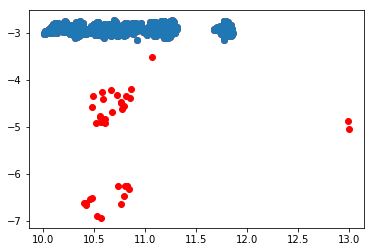

-2.94542312207 0.0845266991496
-2.93087170475 0.0744542451718
There are 24 psf stars.


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:72: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 306854 but corresponding boolean dimension is 1746


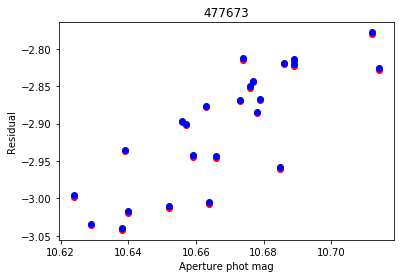

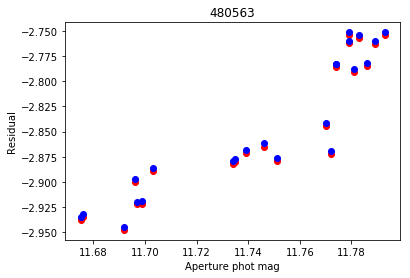

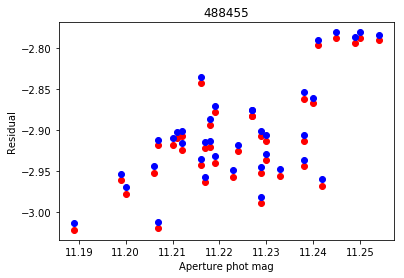

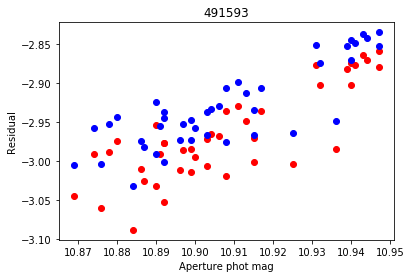

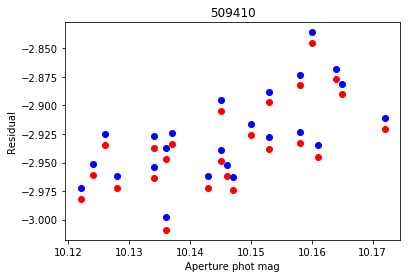

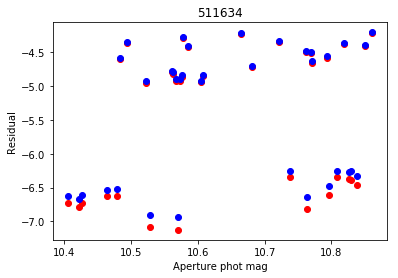

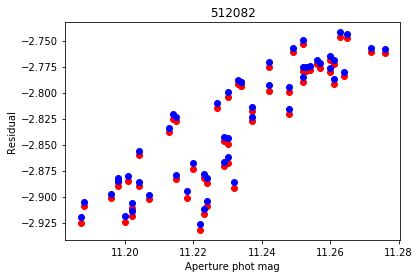

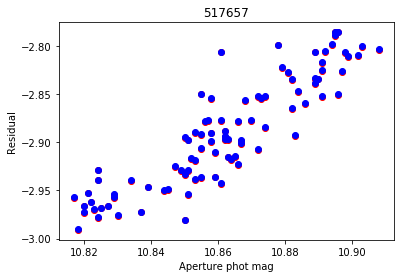

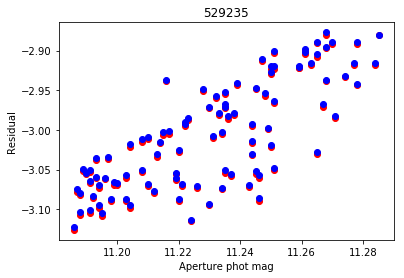

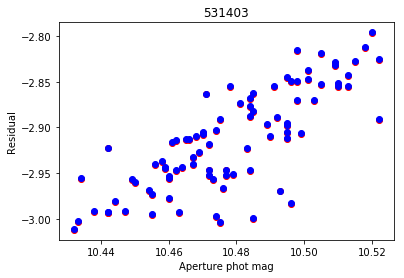

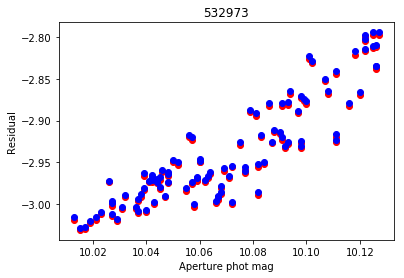

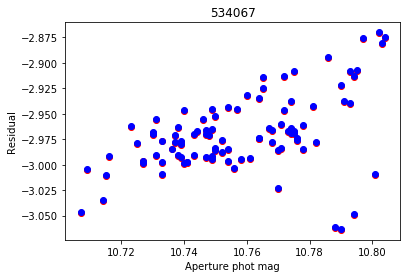

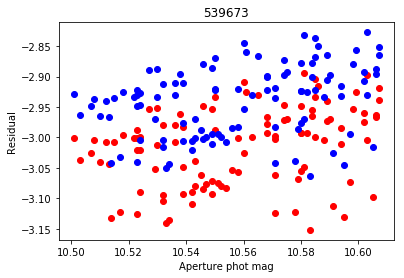

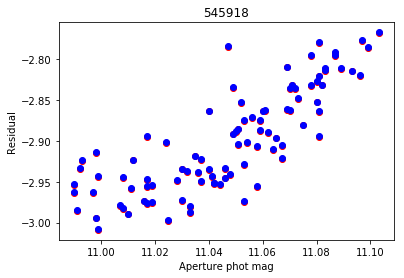

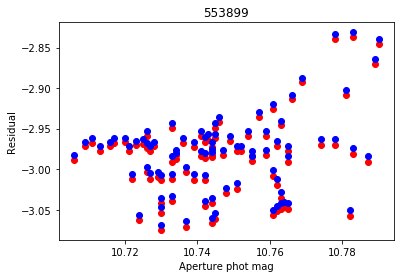

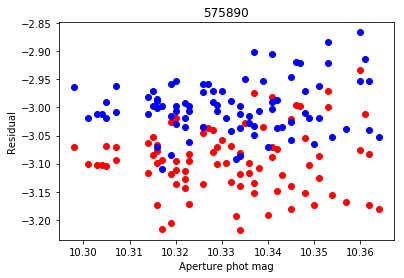

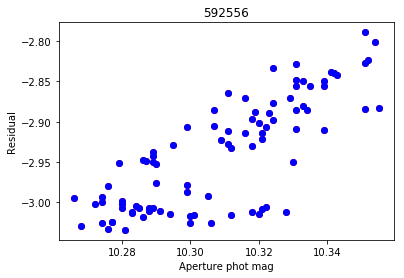

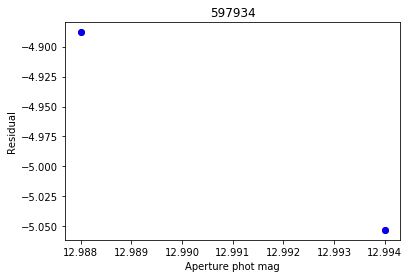

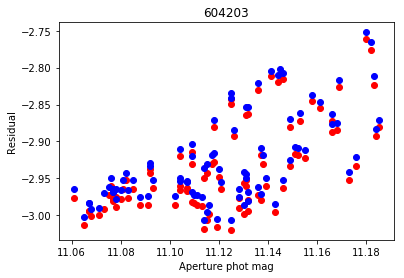

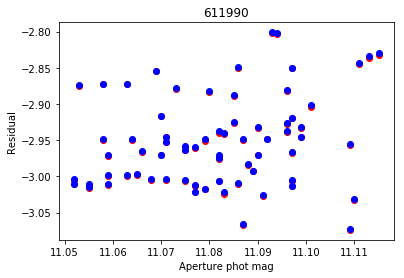

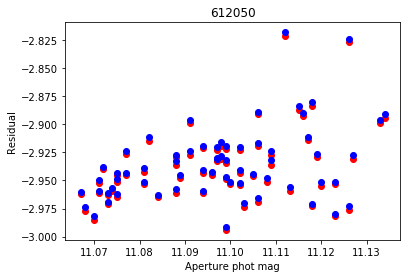

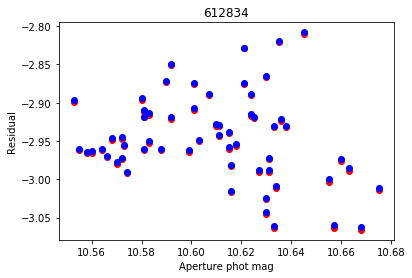

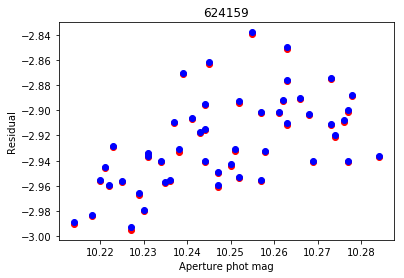

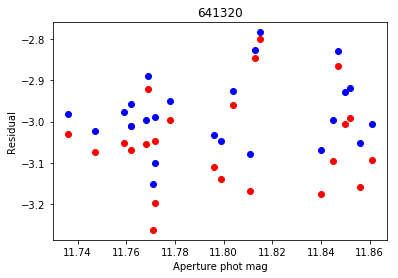

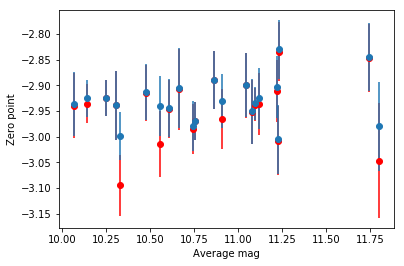

-2.9457024085 0.0584444968453
-2.93059042307 0.0422260966822


In [5]:
channel = 'I1'
I1zmag = 17.13
I2zmag = 16.66
fits_list = glob.glob(folder+'data/'+channel+'*[0-9].fits')

diff1 = np.array([], dtype=float)
diff2 = np.array([], dtype=float)
names = np.array([], dtype=int)
ap_mags = np.array([], dtype=float)
obs_num = np.array([], dtype=float)
err = np.array([], dtype=float)

for img in fits_list: 
    coo_file = re.sub('.fits', '.coo', img)
    ap_file = re.sub('.fits', '.ap', img)
    
    ids, ap_phot, ap_err = read_dao.read_ap(ap_file)
    ap_phot = ap_phot - 25.0 + I1zmag
    data = read_dao.read_coo_new(coo_file)

    diff1 = np.append(diff1, ap_phot - data['mag1'])
    diff2 = np.append(diff2, ap_phot - data['mag2'])
    err = np.append(err, np.sqrt(ap_err**2 + data['err']**2))
    obs_num = np.append(obs_num, np.arange(len(diff1)))
    ap_mags = np.append(ap_mags, ap_phot)
    names = np.append(names, ids)

# delete residuals where the aperture photometry was missing
ap_mags = np.delete(ap_mags, np.argwhere(diff1 > 50))
obs_num = np.delete(obs_num, np.argwhere(diff1 > 50))
diff2 = np.delete(diff2, np.argwhere(diff1 > 50))
err = np.delete(err, np.argwhere(diff1 > 50))
names = np.delete(names, np.argwhere(diff1 > 50))
diff1 = np.delete(diff1, np.argwhere(diff1 > 50))

# delete saturated stars
obs_num = np.delete(obs_num, np.argwhere(ap_mags < 10))
diff2 = np.delete(diff2, np.argwhere(ap_mags < 10))
err = np.delete(err, np.argwhere(ap_mags < 10))
names = np.delete(names, np.argwhere(ap_mags < 10))
diff1 = np.delete(diff1, np.argwhere(ap_mags < 10))
ap_mags = np.delete(ap_mags, np.argwhere(ap_mags < 10))

# delete faint stars
obs_num = np.delete(obs_num, np.argwhere(ap_mags > 13))
diff2 = np.delete(diff2, np.argwhere(ap_mags > 13))
err = np.delete(err, np.argwhere(ap_mags > 13))
names = np.delete(names, np.argwhere(ap_mags > 13))
diff1 = np.delete(diff1, np.argwhere(ap_mags > 13))
ap_mags = np.delete(ap_mags, np.argwhere(ap_mags > 13))

# sigma clip full sample
filtered_diff1 = sigma_clip(diff1, sigma=3, iters=5)
filtered_diff2 = sigma_clip(diff2, sigma=3, iters=5)


mp.plot(ap_mags, diff2, 'ro')
mp.plot(ap_mags, filtered_diff2, 'o')
mp.show()
print np.mean(filtered_diff1), np.std(filtered_diff1)
print np.mean(filtered_diff2), np.std(filtered_diff2)

psf_stars = np.unique(names)
print 'There are {} psf stars.'.format(len(psf_stars))

avg_zp1 = np.zeros(len(psf_stars))
avg_zp2 = np.zeros(len(psf_stars))
std_zp1 = np.zeros(len(psf_stars))
std_zp2 = np.zeros(len(psf_stars))
avg_mag = np.zeros(len(psf_stars))
for ind, star in enumerate(psf_stars):
    x = obs_num[names == star]
    y3 = ap_mags[names == star]
    y1 = diff1[names == star]
    y2 = diff2[names == star]
    filtered_y3 = sigma_clip(y3, sigma=2, iters=5)
    mp.plot(filtered_y3, y1, 'ro')
    mp.plot(filtered_y3, y2, 'bo')
    mp.xlabel('Aperture phot mag')
    mp.ylabel('Residual')
    mp.title(star)
    mp.show()
    avg_zp2[ind] = np.mean(y2[y3 == filtered_y3])
    avg_zp1[ind] = np.mean(y1[y3 == filtered_y3])
    std_zp1[ind] = np.std(y1[y3 == filtered_y3])
    std_zp2[ind] = np.std(y2[y3 == filtered_y3])
    avg_mag[ind] = np.mean(y3[y3 == filtered_y3])


filtered_avzp1 = sigma_clip(avg_zp1, sigma=3, iters=5)  
filtered_avzp2 = sigma_clip(avg_zp2, sigma=3, iters=5)
mp.errorbar(avg_mag, filtered_avzp1, yerr=std_zp1, fmt='ro')
mp.errorbar(avg_mag, filtered_avzp2, yerr=std_zp2, fmt='o')
mp.xlabel('Average mag')
mp.ylabel('Zero point')
mp.show()

print np.mean(filtered_avzp1), np.std(filtered_avzp1)
print np.mean(filtered_avzp2), np.std(filtered_avzp2)

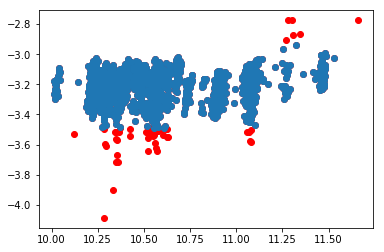

-3.23293301759 0.113794197257
-3.21185791978 0.0967655408087
There are 26 psf stars.


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:72: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 292292 but corresponding boolean dimension is 1518


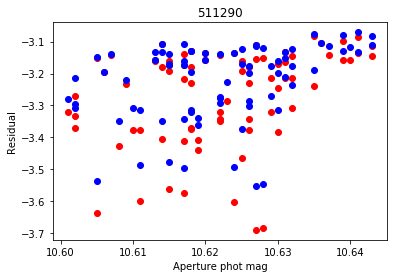

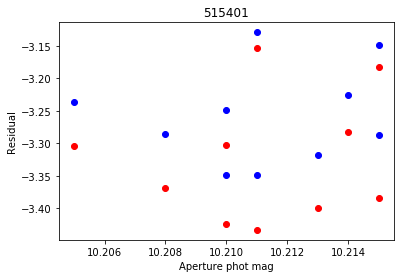

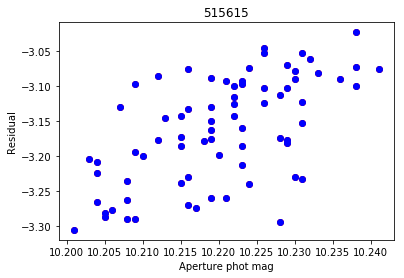

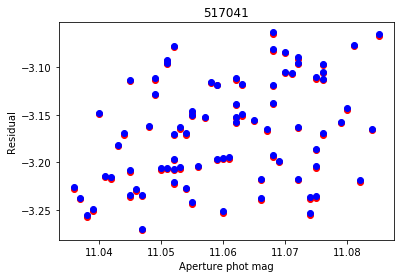

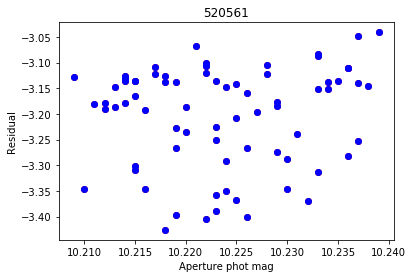

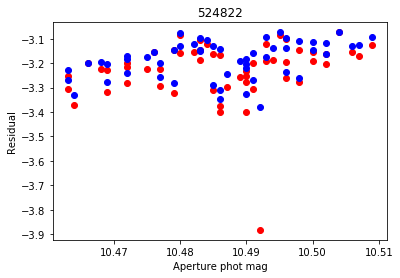

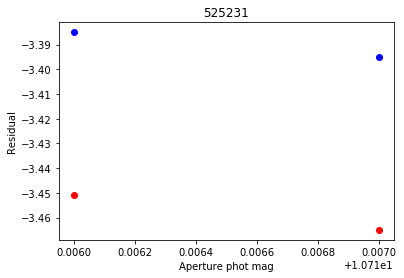

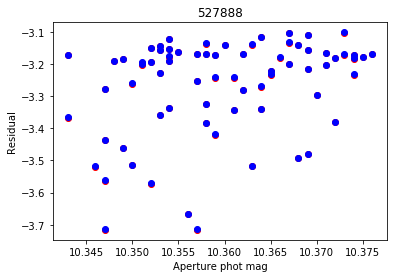

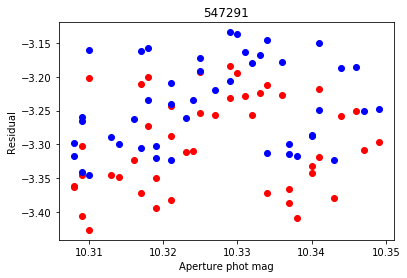

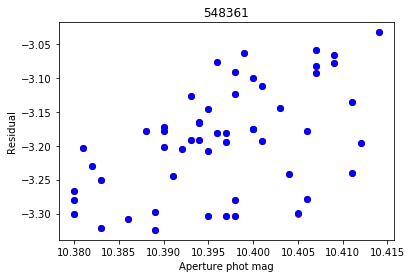

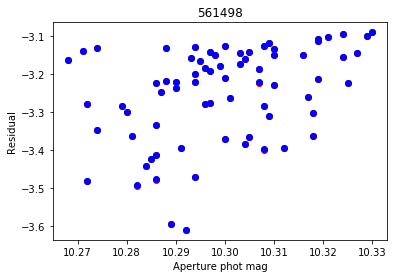

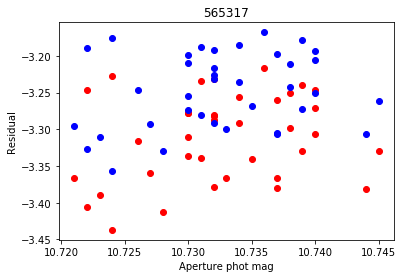

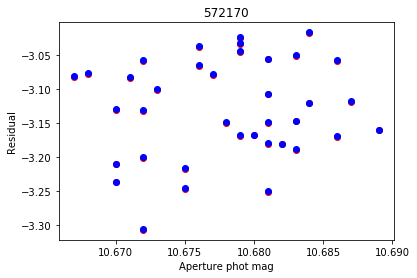

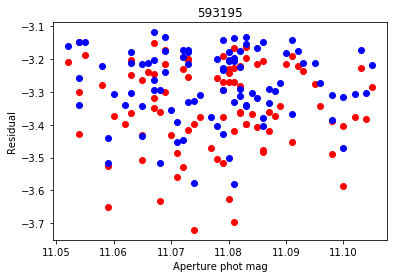

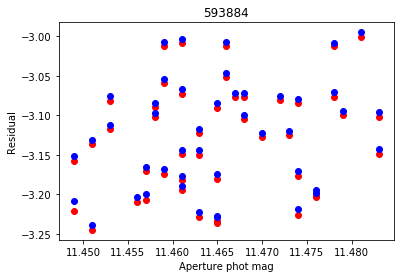

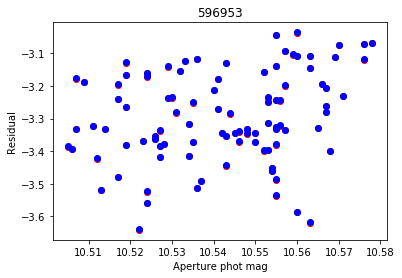

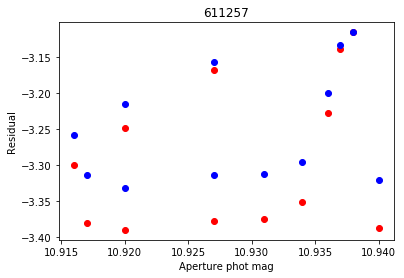

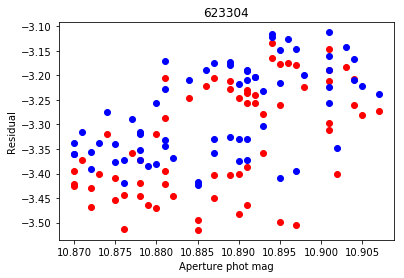

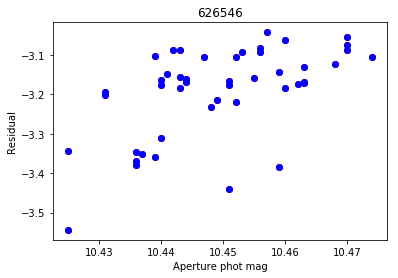

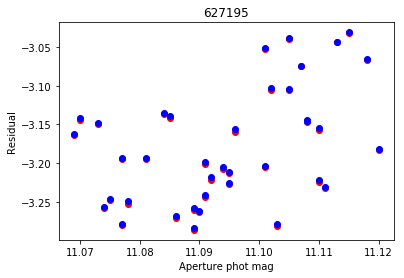

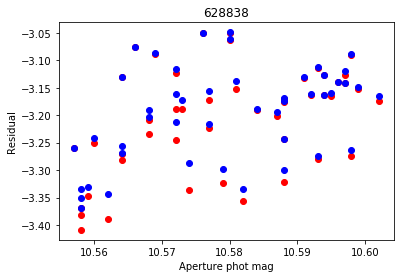

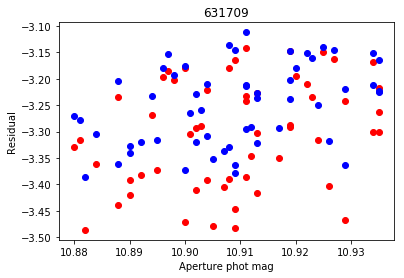

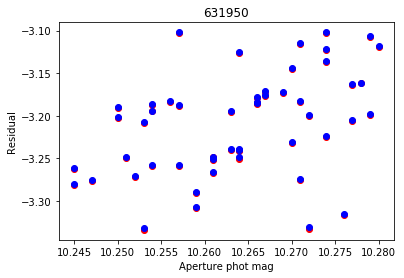

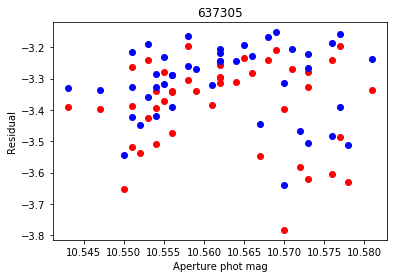

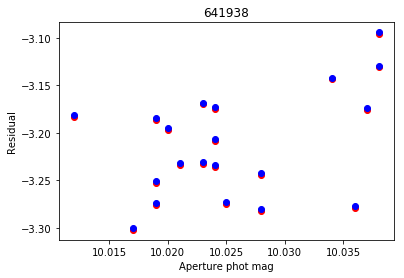

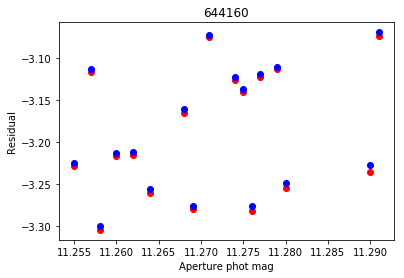

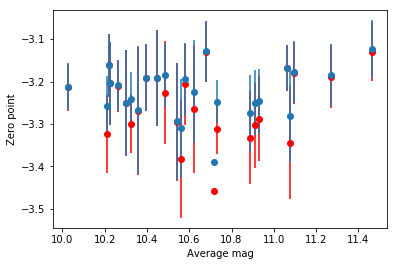

-3.25094099699 0.0787797612967
-3.22571186957 0.0577128248672


In [4]:
channel = 'I2'
I1zmag = 17.13
I2zmag = 16.66
fits_list = glob.glob(folder+'data/'+channel+'*[0-9].fits')

diff1 = np.array([], dtype=float)
diff2 = np.array([], dtype=float)
names = np.array([], dtype=int)
ap_mags = np.array([], dtype=float)
obs_num = np.array([], dtype=float)
err = np.array([], dtype=float)

for img in fits_list: 
    coo_file = re.sub('.fits', '.coo', img)
    ap_file = re.sub('.fits', '.ap', img)
    
    ids, ap_phot, ap_err = read_dao.read_ap(ap_file)
    ap_phot = ap_phot - 25.0 + I2zmag
    data = read_dao.read_coo_new(coo_file)

    diff1 = np.append(diff1, ap_phot - data['mag1'])
    diff2 = np.append(diff2, ap_phot - data['mag2'])
    err = np.append(err, np.sqrt(ap_err**2 + data['err']**2))
    obs_num = np.append(obs_num, np.arange(len(diff1)))
    ap_mags = np.append(ap_mags, ap_phot)
    names = np.append(names, ids)

# delete residuals where the aperture photometry was missing
ap_mags = np.delete(ap_mags, np.argwhere(diff1 > 50))
obs_num = np.delete(obs_num, np.argwhere(diff1 > 50))
diff2 = np.delete(diff2, np.argwhere(diff1 > 50))
err = np.delete(err, np.argwhere(diff1 > 50))
names = np.delete(names, np.argwhere(diff1 > 50))
diff1 = np.delete(diff1, np.argwhere(diff1 > 50))

# delete saturated stars
obs_num = np.delete(obs_num, np.argwhere(ap_mags < 10))
diff2 = np.delete(diff2, np.argwhere(ap_mags < 10))
err = np.delete(err, np.argwhere(ap_mags < 10))
names = np.delete(names, np.argwhere(ap_mags < 10))
diff1 = np.delete(diff1, np.argwhere(ap_mags < 10))
ap_mags = np.delete(ap_mags, np.argwhere(ap_mags < 10))

# delete faint stars
obs_num = np.delete(obs_num, np.argwhere(ap_mags > 14))
diff2 = np.delete(diff2, np.argwhere(ap_mags > 14))
err = np.delete(err, np.argwhere(ap_mags > 14))
names = np.delete(names, np.argwhere(ap_mags > 14))
diff1 = np.delete(diff1, np.argwhere(ap_mags > 14))
ap_mags = np.delete(ap_mags, np.argwhere(ap_mags > 14))

# sigma clip full sample
filtered_diff1 = sigma_clip(diff1, sigma=3, iters=5)
filtered_diff2 = sigma_clip(diff2, sigma=3, iters=5)


mp.plot(ap_mags, diff2, 'ro')
mp.plot(ap_mags, filtered_diff2, 'o')
mp.show()
print np.mean(filtered_diff1), np.std(filtered_diff1)
print np.mean(filtered_diff2), np.std(filtered_diff2)

psf_stars = np.unique(names)
print 'There are {} psf stars.'.format(len(psf_stars))

avg_zp1 = np.zeros(len(psf_stars))
avg_zp2 = np.zeros(len(psf_stars))
std_zp1 = np.zeros(len(psf_stars))
std_zp2 = np.zeros(len(psf_stars))
avg_mag = np.zeros(len(psf_stars))
for ind, star in enumerate(psf_stars):
    x = obs_num[names == star]
    y3 = ap_mags[names == star]
    y1 = diff1[names == star]
    y2 = diff2[names == star]
    filtered_y3 = sigma_clip(y3, sigma=2, iters=5)
    mp.plot(filtered_y3, y1, 'ro')
    mp.plot(filtered_y3, y2, 'bo')
    mp.xlabel('Aperture phot mag')
    mp.ylabel('Residual')
    mp.title(star)
    mp.show()
    avg_zp2[ind] = np.mean(y2[y3 == filtered_y3])
    avg_zp1[ind] = np.mean(y1[y3 == filtered_y3])
    std_zp1[ind] = np.std(y1[y3 == filtered_y3])
    std_zp2[ind] = np.std(y2[y3 == filtered_y3])
    avg_mag[ind] = np.mean(y3[y3 == filtered_y3])


filtered_avzp1 = sigma_clip(avg_zp1, sigma=3, iters=5)  
filtered_avzp2 = sigma_clip(avg_zp2, sigma=3, iters=5)
mp.errorbar(avg_mag, filtered_avzp1, yerr=std_zp1, fmt='ro')
mp.errorbar(avg_mag, filtered_avzp2, yerr=std_zp2, fmt='o')
mp.xlabel('Average mag')
mp.ylabel('Zero point')
mp.show()

print np.mean(filtered_avzp1), np.std(filtered_avzp1)
print np.mean(filtered_avzp2), np.std(filtered_avzp2)

In [3]:
calibration.apply_calibration(target, 'I1', -2.93, data_dir=folder)
calibration.apply_calibration(target, 'I2', -3.23, data_dir=folder)

## MIR catalog

In [4]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
analysis_routines.merge_opt_deep_catalogs(target, optical_dir, folder, cluster_coord=[center_ra, center_dec])

Reading optical catalog for NGC6441...
Finished reading optical catalog.
Reading MIR catalog for NGC6441...


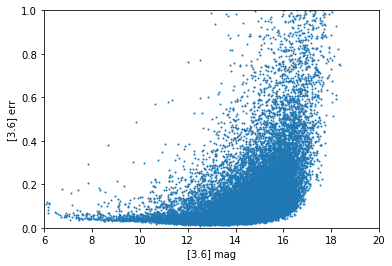

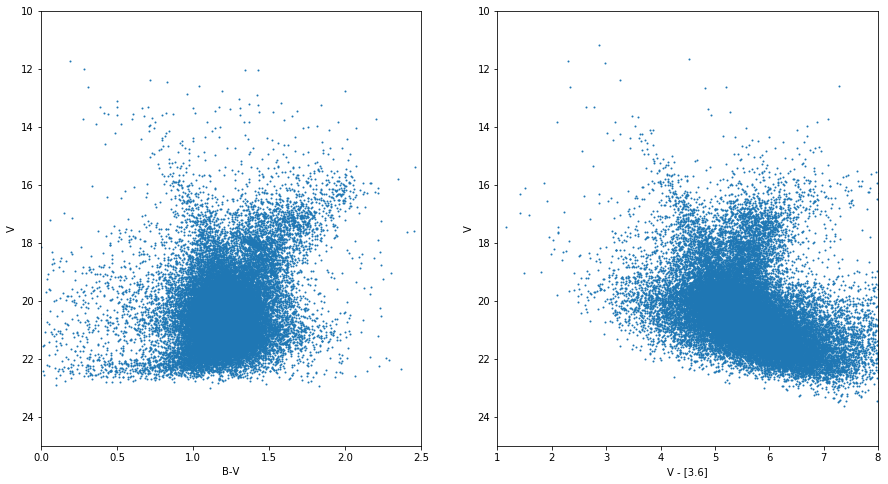

In [7]:
#center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
# change to read merged catalog
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorBV = catalog_data['B'][(dist > thres2) & (dist < thres)] - catalog_data['V'][(dist > thres2) & (dist < thres)]
Vmag = catalog_data['V'][(dist > thres2) & (dist < thres)]
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

fig = mp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(magIR, err, s=1, edgecolor=None)
ax1.set_ylim((0,1.0))
ax1.set_xlim((6,20))
ax1.set_xlabel('[3.6] mag')
ax1.set_ylabel('[3.6] err')

good_mag = mag[err < 1]
good_color = colorVIR[err < 1]

fig2 = mp.figure(figsize=(15,8))
ax2 = fig2.add_subplot(121)
ax2.scatter(colorBV, Vmag, s=1, edgecolor=None)
ax2.set_ylim((25,10))
ax2.set_xlim((0,2.5))
ax2.set_xlabel('B-V')
ax2.set_ylabel('V')
ax3 = fig2.add_subplot(122)
ax3.scatter(good_color, good_mag, s=1, edgecolor=None)
ax3.set_ylim((25,10))
ax3.set_xlim((1,8))
ax3.set_xlabel('V - [3.6]')
ax3.set_ylabel('V')
mp.savefig(folder+target+'cmd.eps', format='eps')

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

##  Generate MIR light curves matching optical ID numbers  

In [8]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

## First check on RRL PL relation

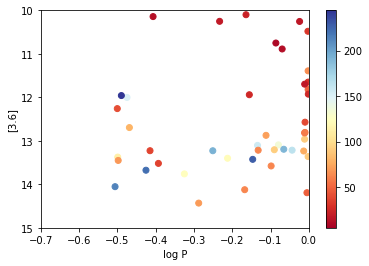

In [4]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

catalog_data = analysis_routines.read_merged_catalog(folder)

mag = np.zeros(len(data['id']))
dist = np.zeros(len(data['id']))

for ind, star in enumerate(data['id']):
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    if len(dao_id) == 0: continue
    m = catalog_data['3.6'][catalog_data['id'] == dao_id]  
    d = catalog_data['rad_dist'][catalog_data['id'] == dao_id]
    if m < 50: 
        mag[ind] = m
        dist[ind] = d
    if m > 50: 
        mag[ind] = np.nan
        dist[ind] = np.nan

cm = mp.cm.get_cmap('RdYlBu')    
mp.scatter(np.log10(data['new_period']), mag, c=dist, cmap=cm) 
mp.colorbar()
mp.ylim((15, 10))
mp.xlim((-0.7, 0))
mp.xlabel('log P')
mp.ylabel('[3.6]')

#### Phase MIR light curves

In [49]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

V27 not found.
V30 not found.
V46 not found.
V52 not found.
V53 not found.
V54 not found.
V55 not found.
V60 not found.
V61 not found.
V62 not found.
V63 not found.
V64 not found.
V66 not found.
V69 not found.
V72 not found.
V80 not found.
V84 not found.


#### Create figure with all bands phased together

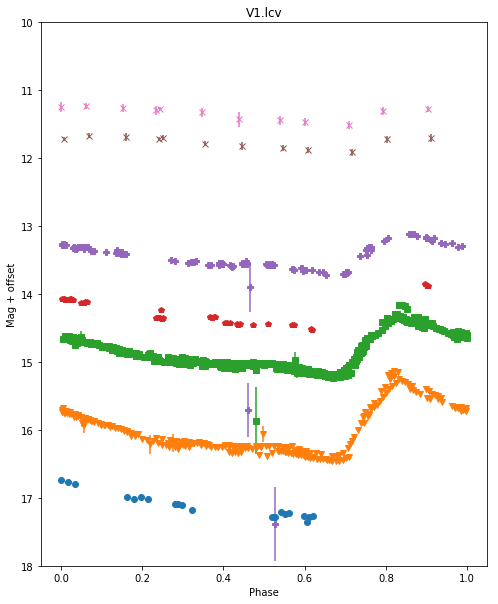

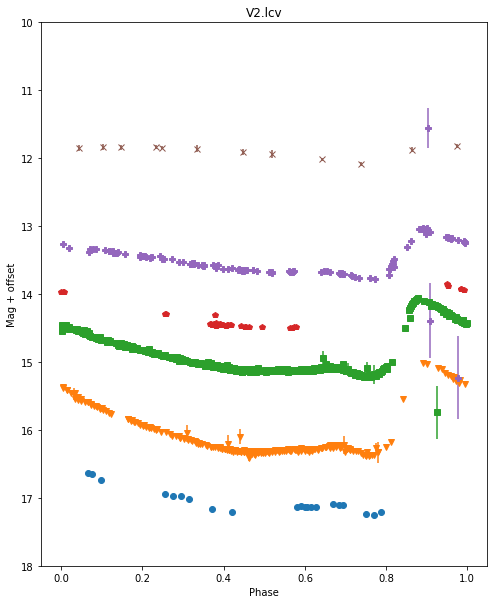

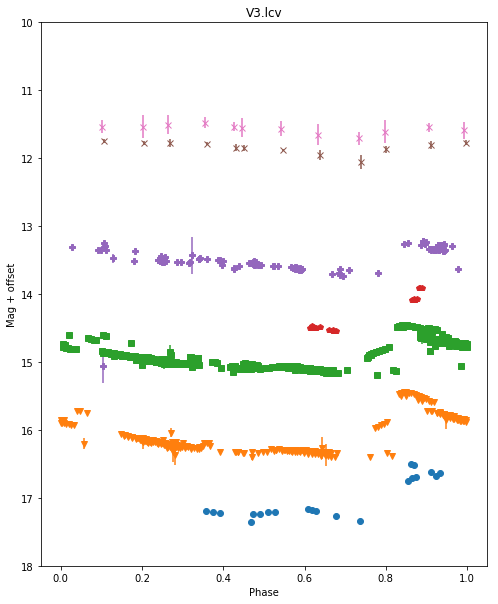

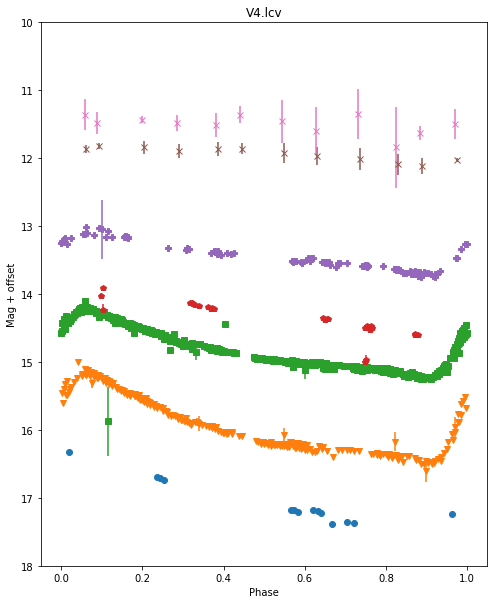

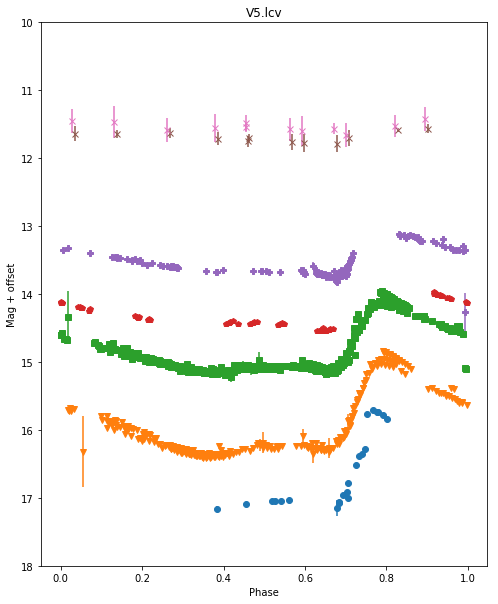

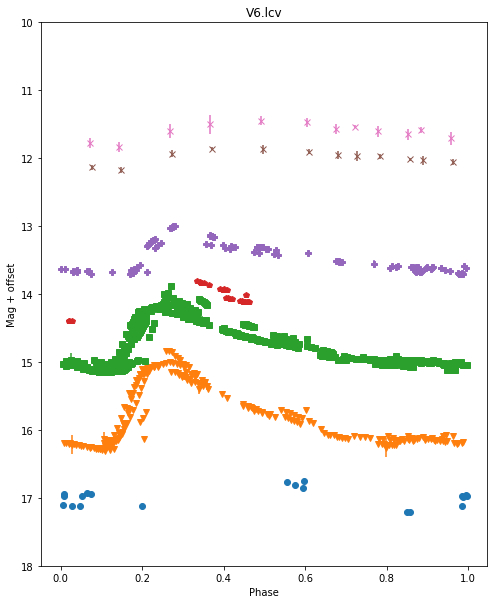

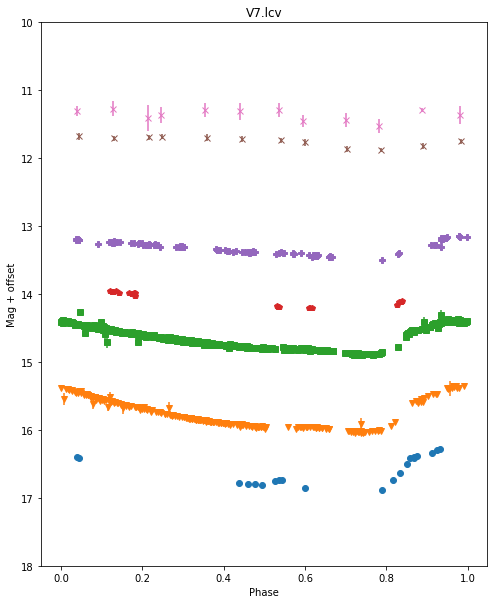

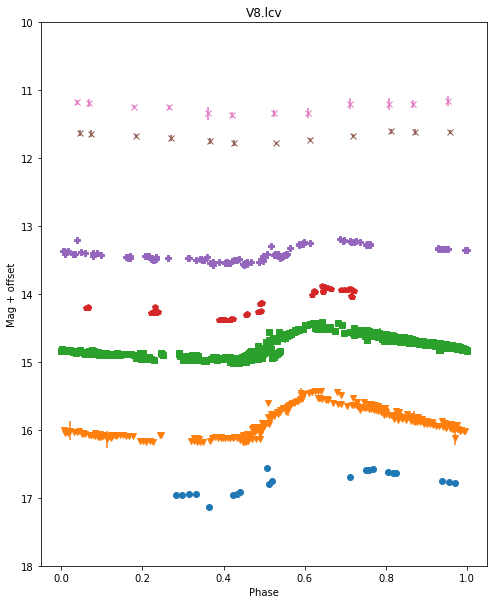

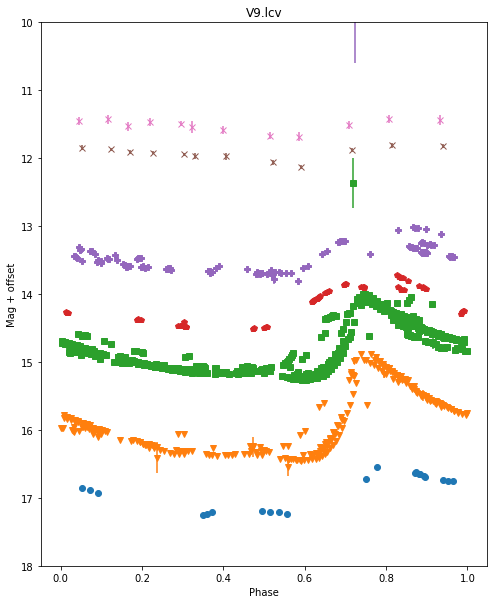

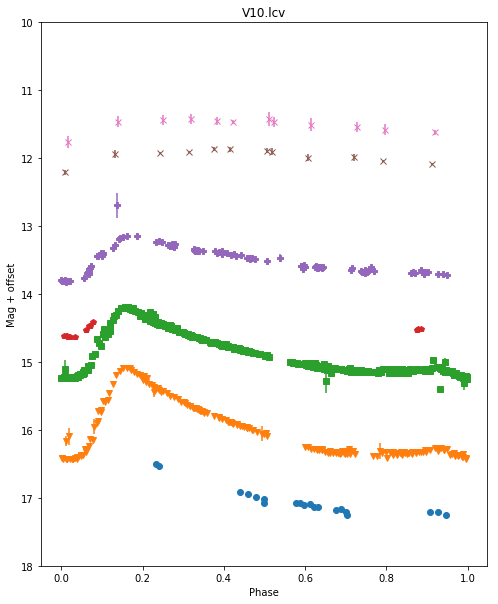

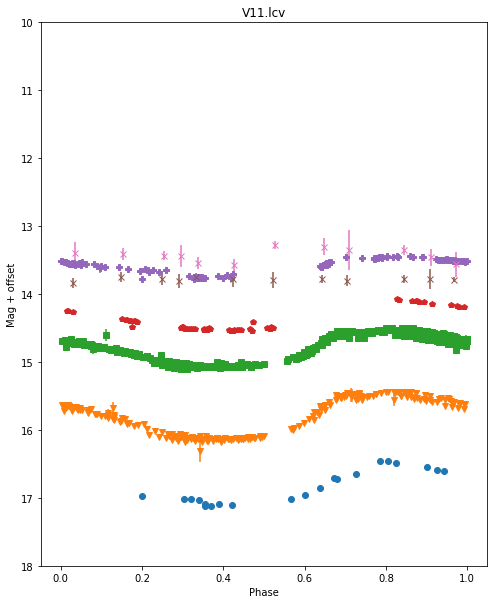

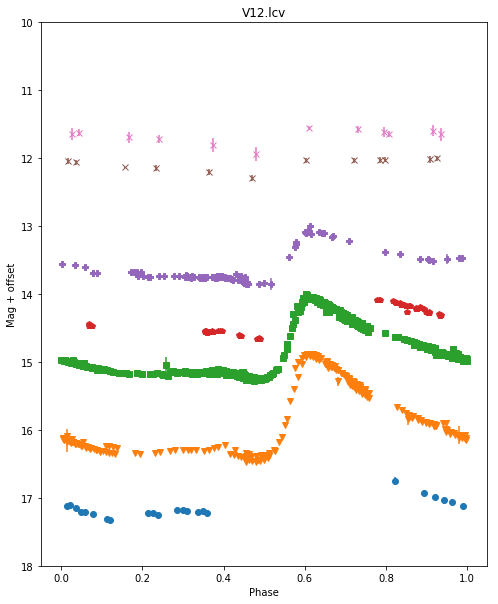

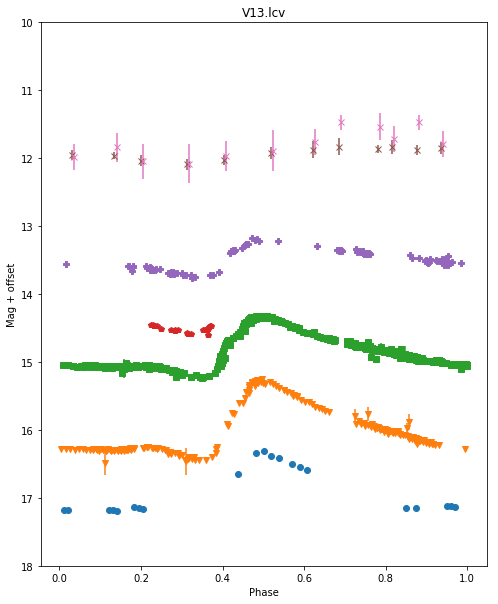

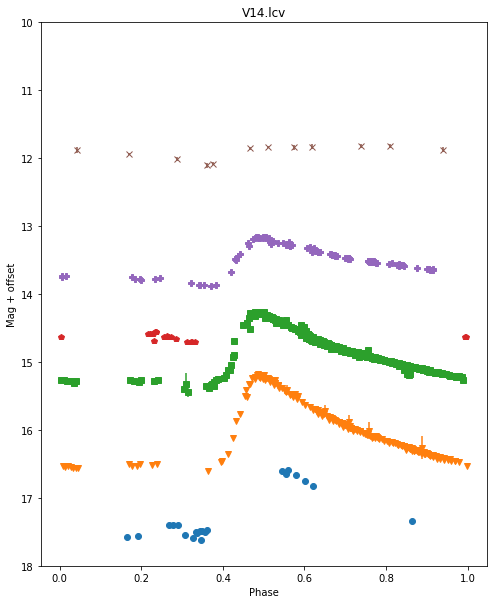

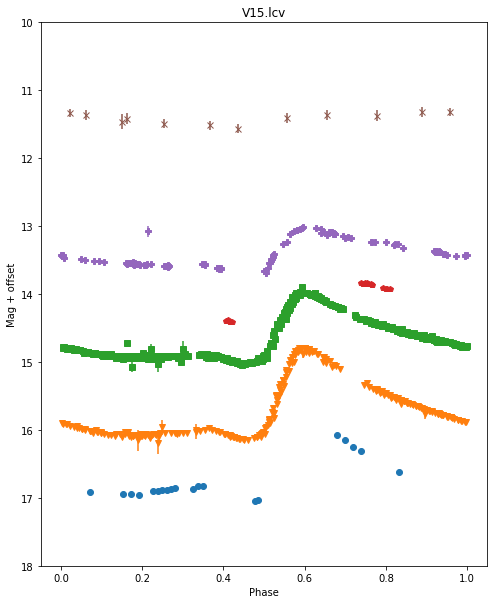

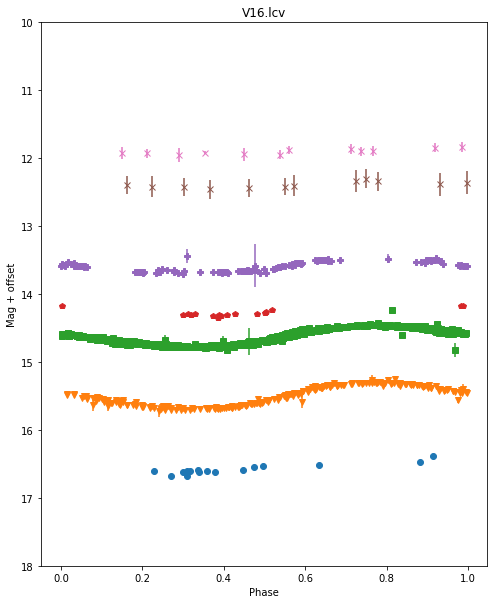

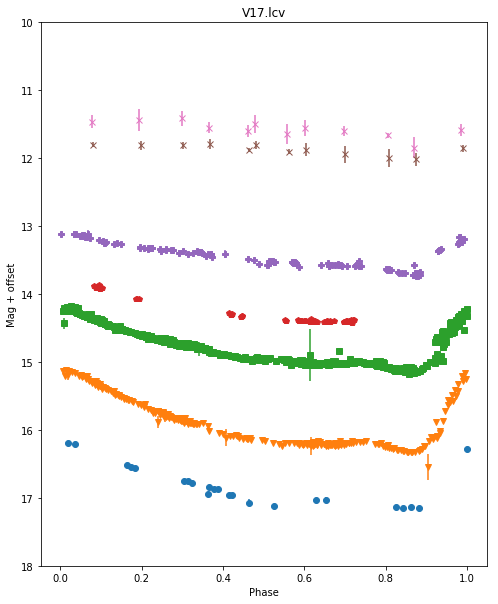

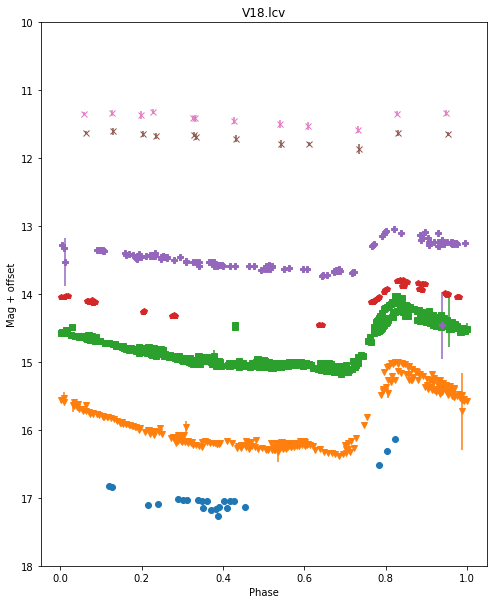

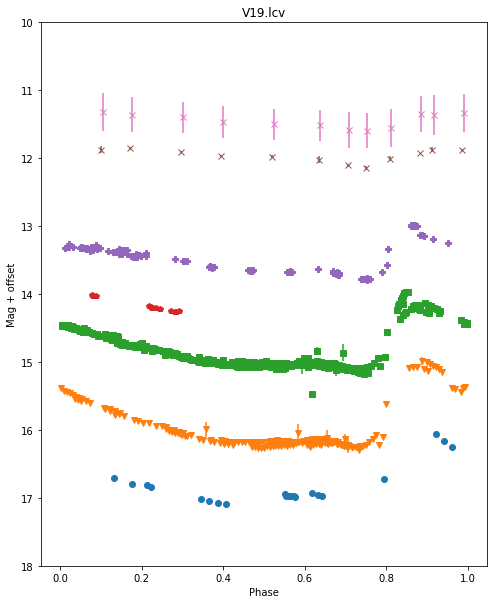

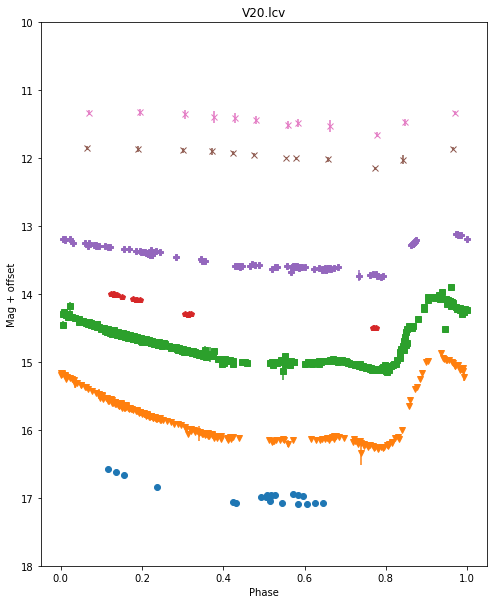

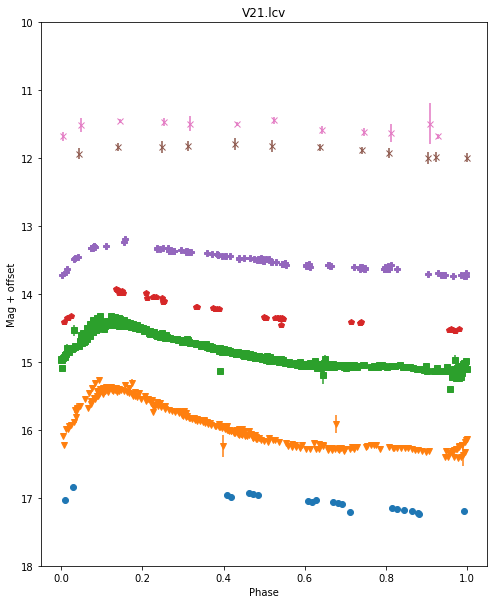

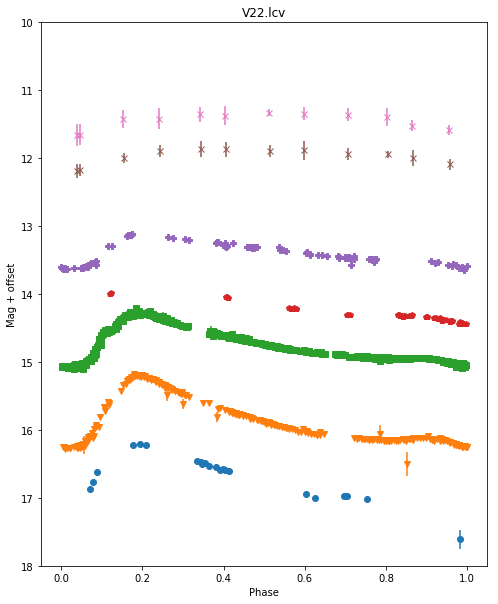

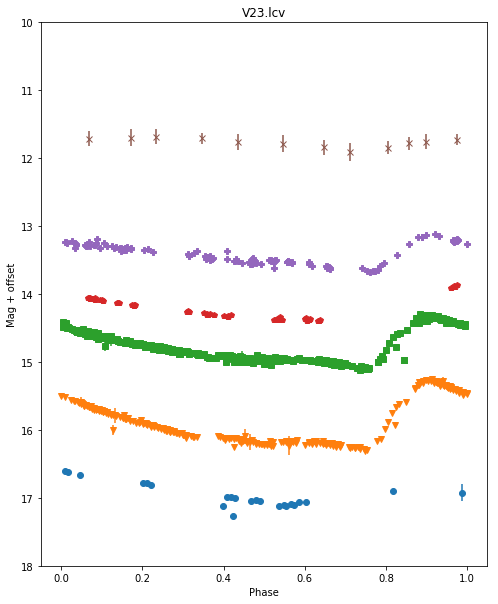

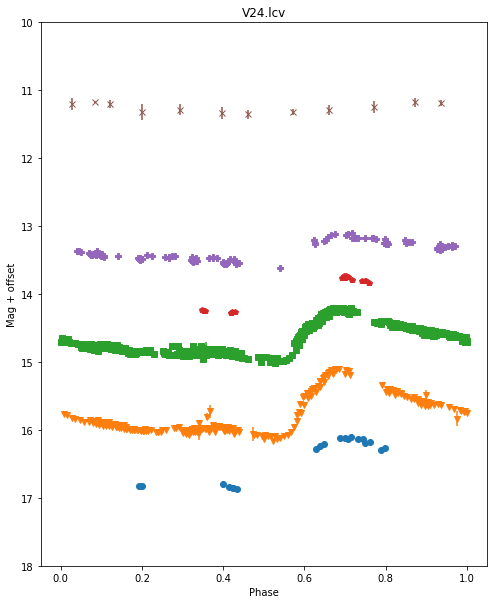

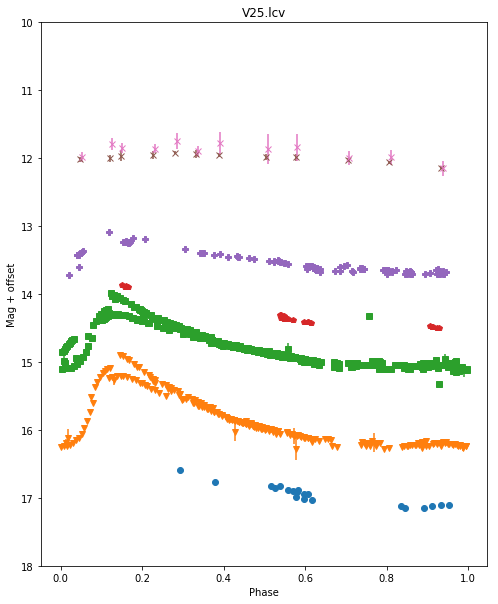

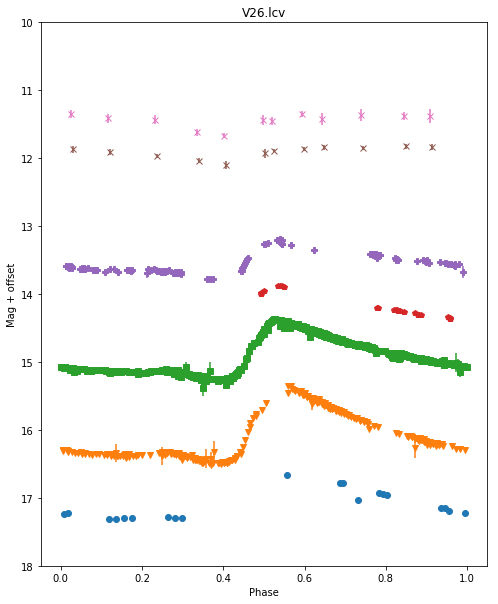

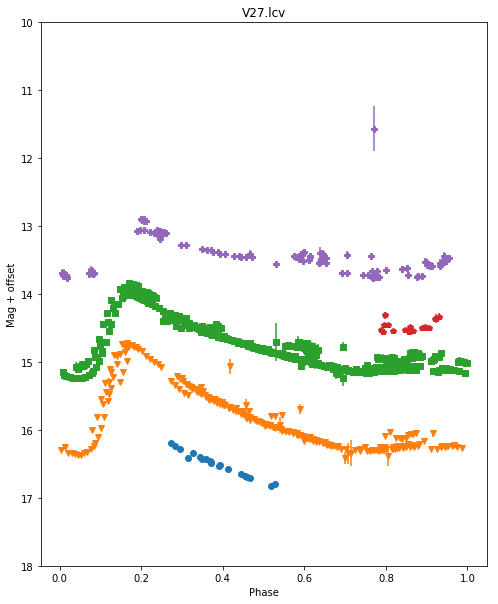

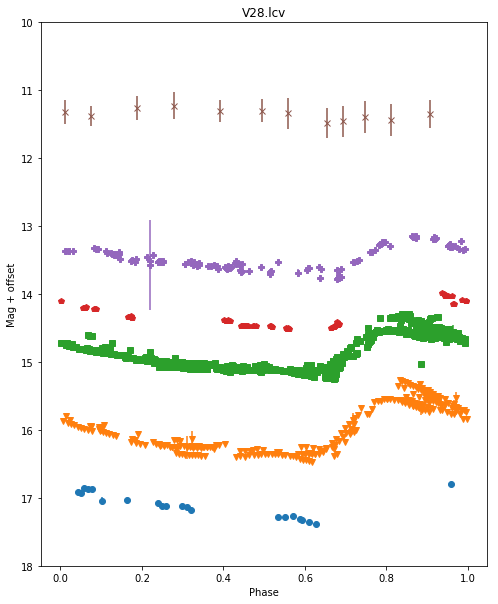

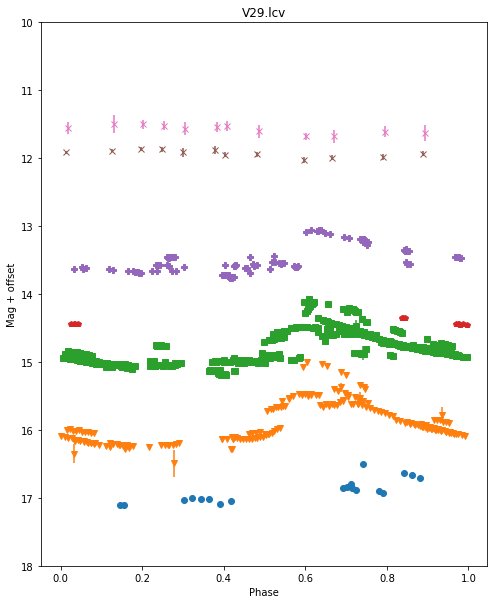

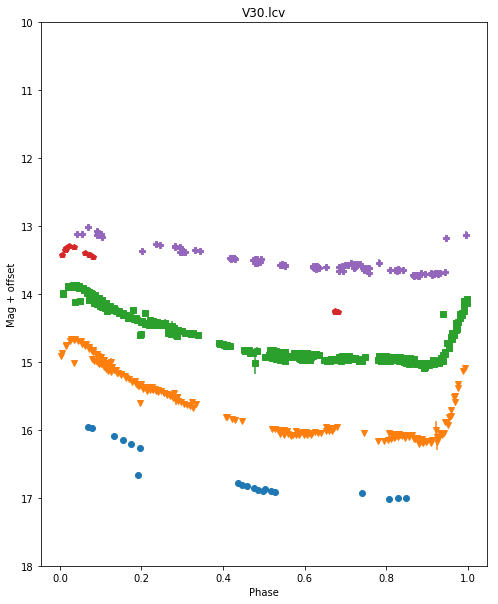

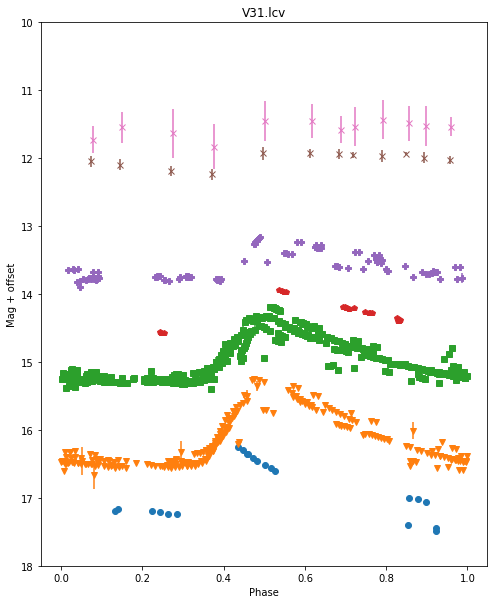

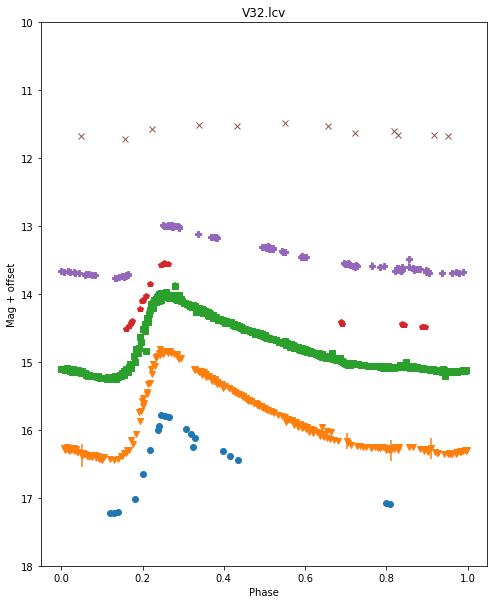

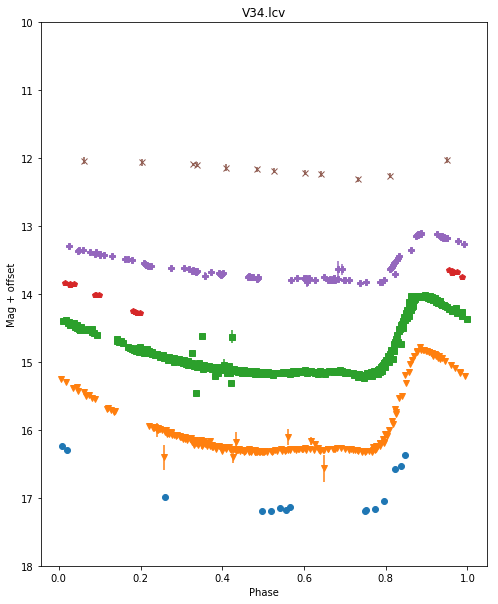

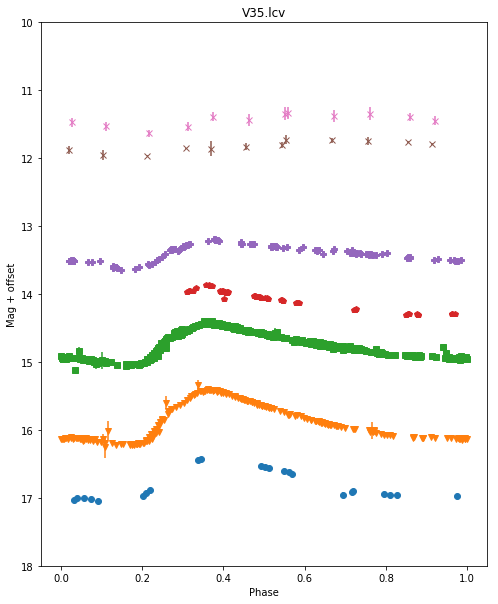

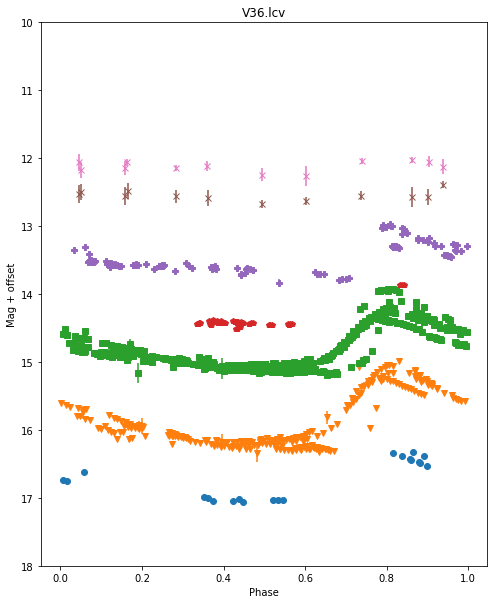

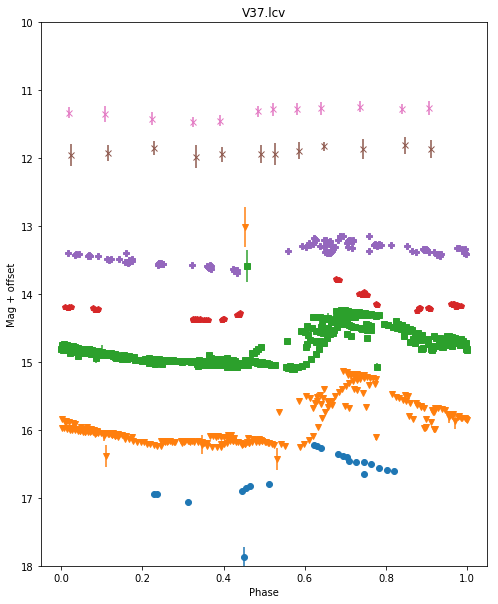

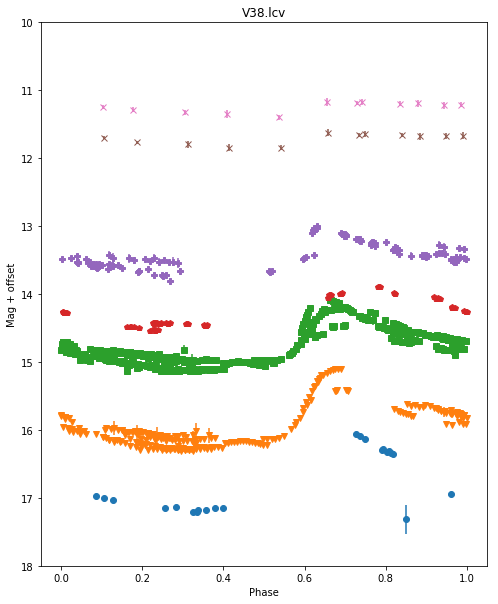

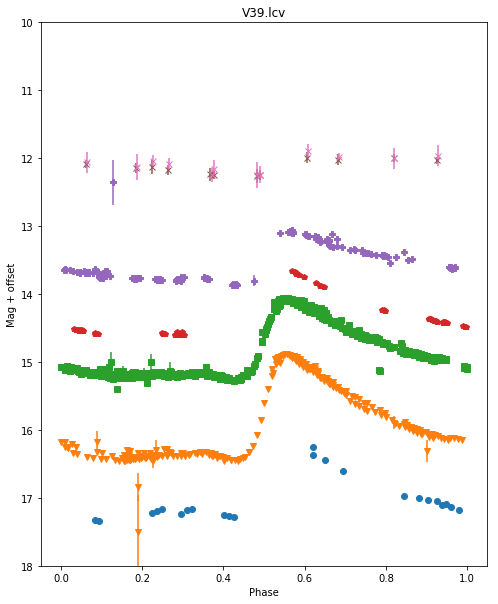

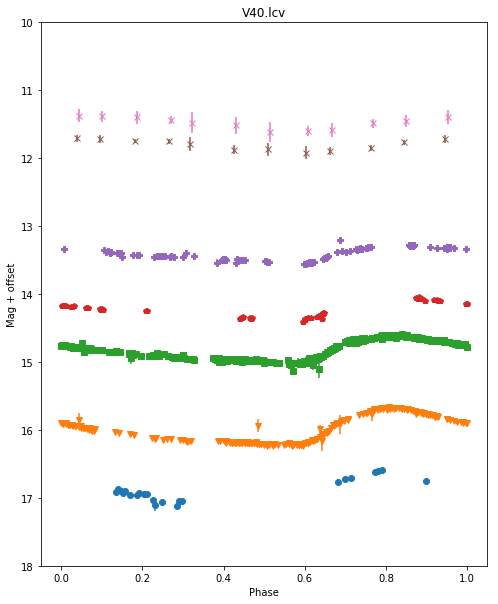

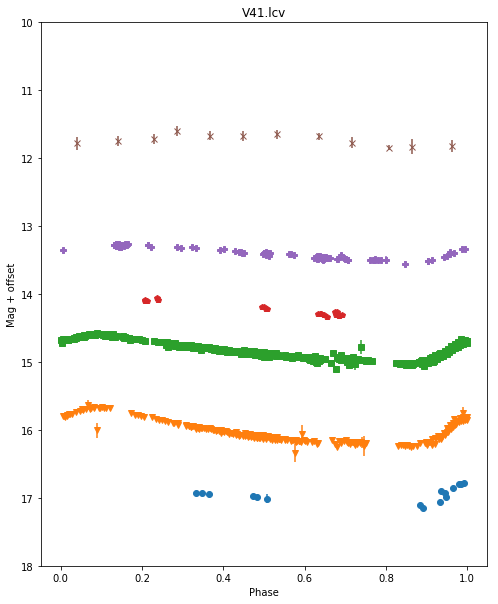

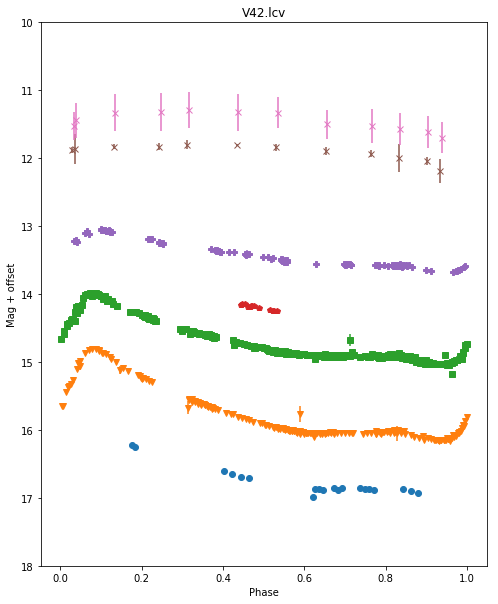

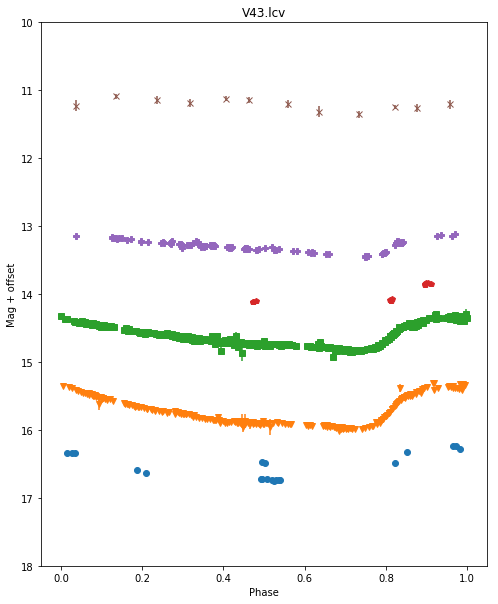

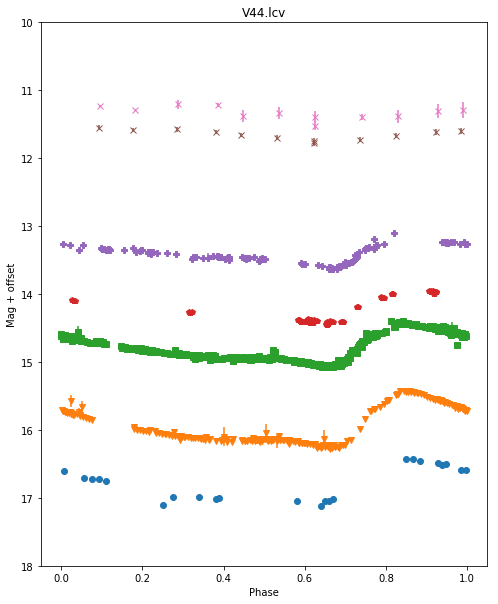

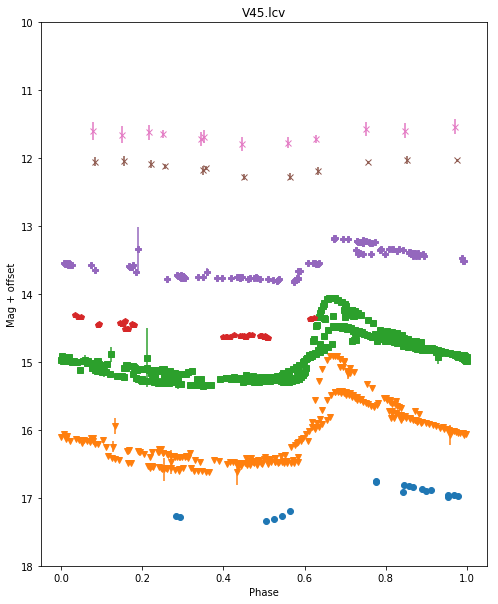

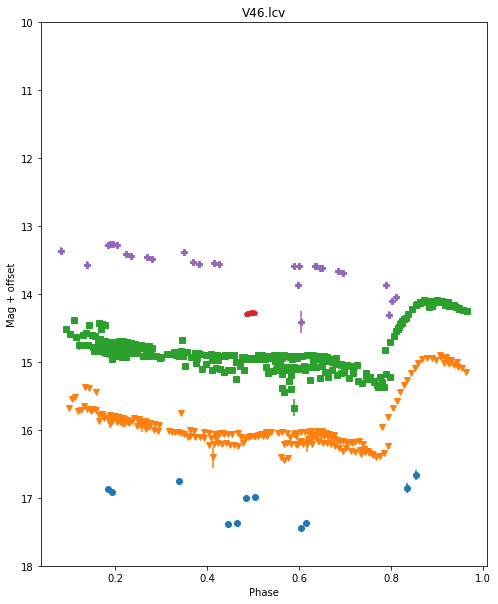

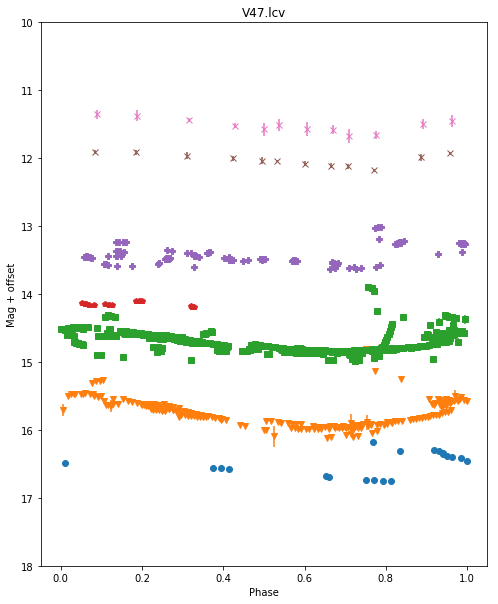

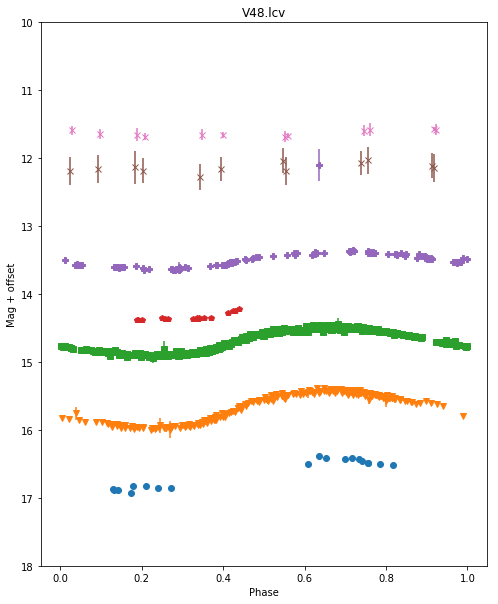

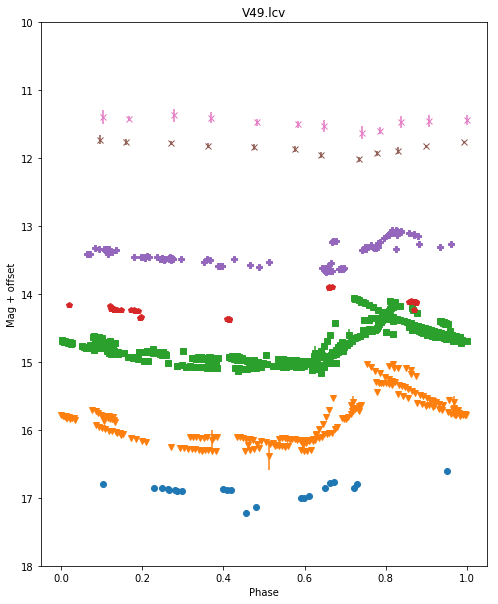

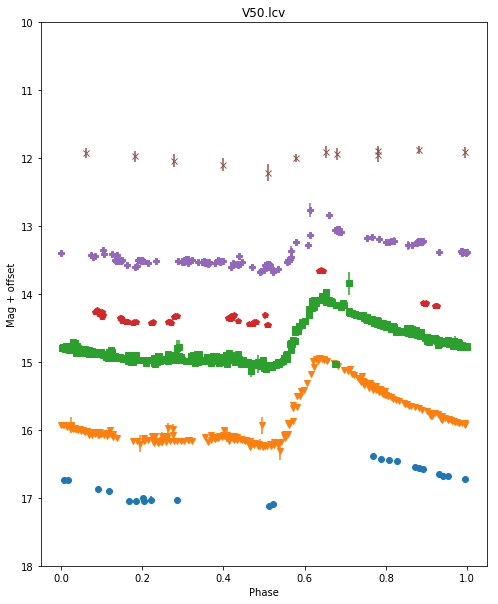

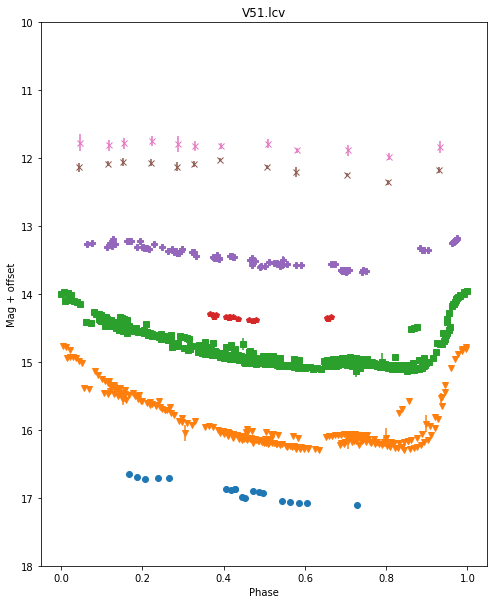

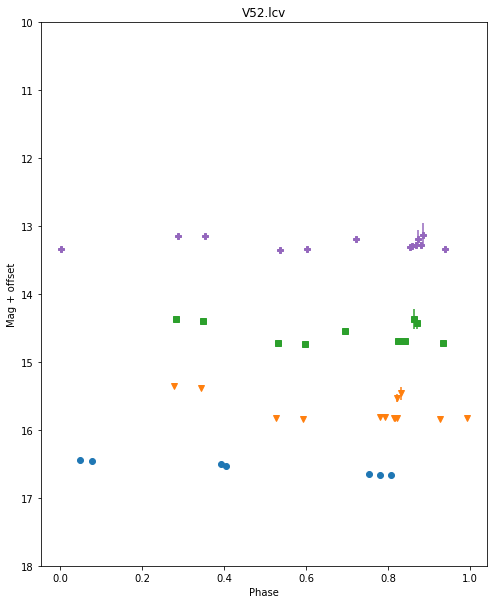

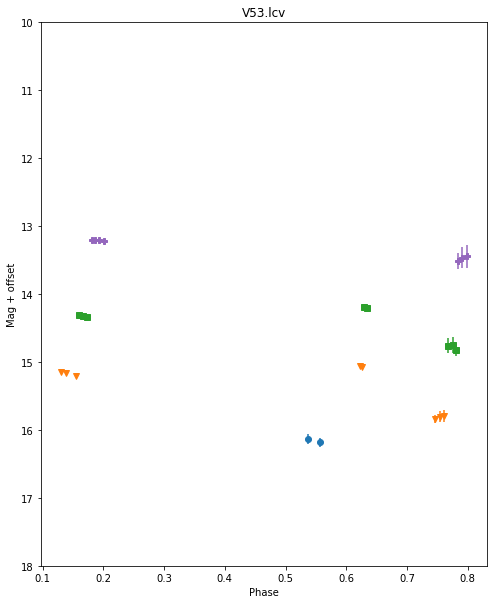

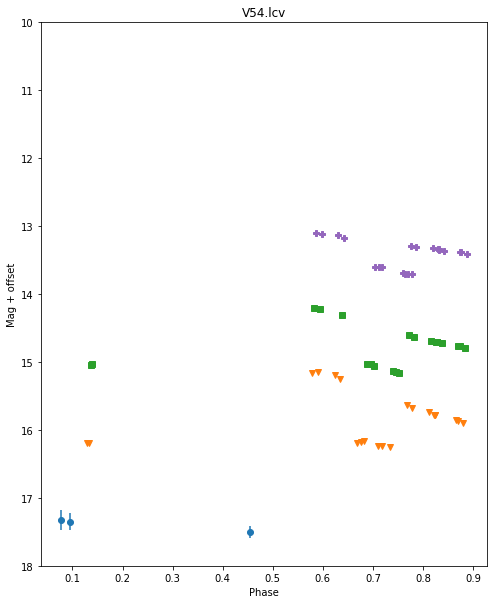

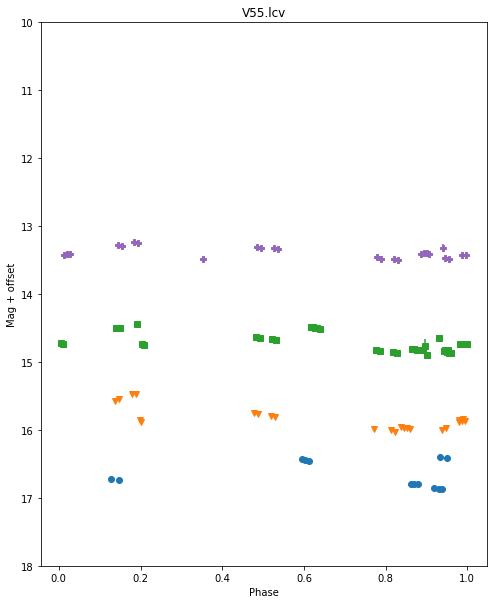

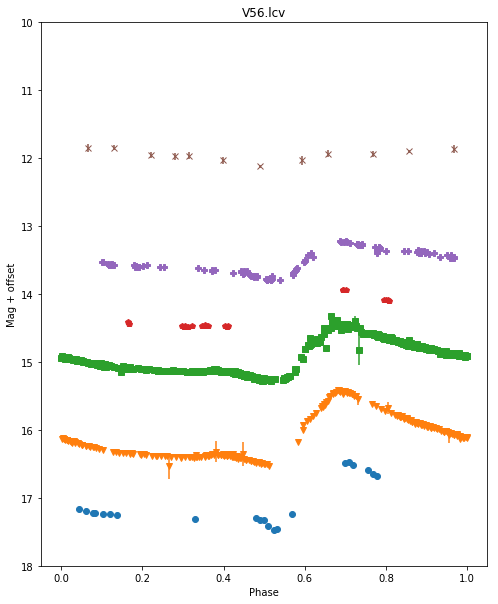

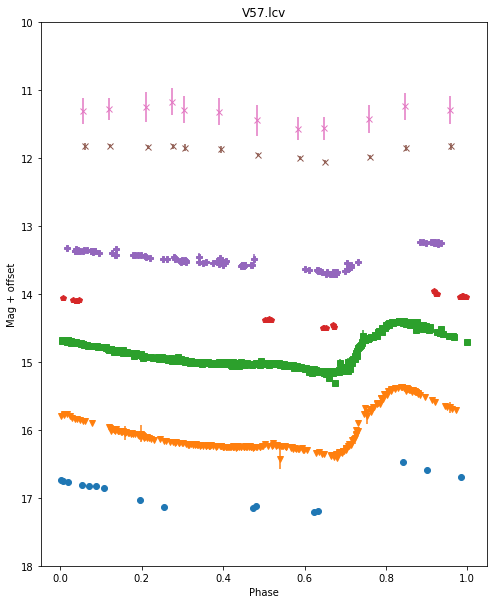

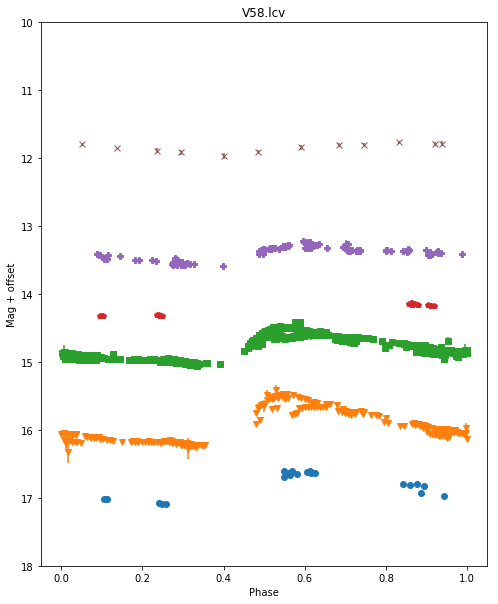

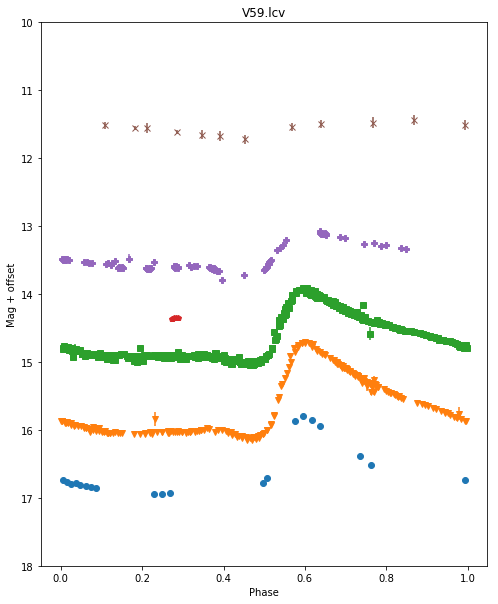

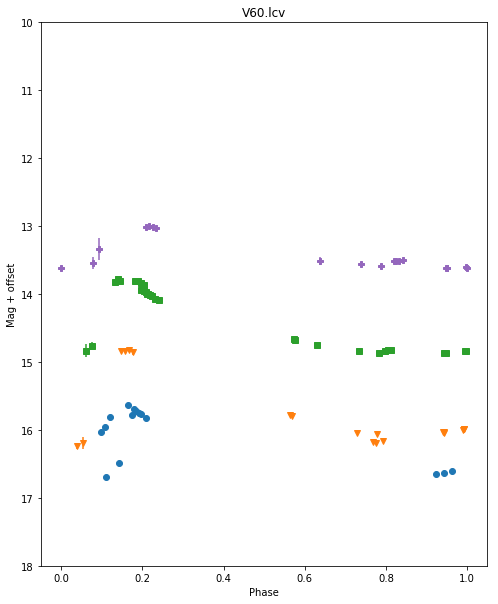

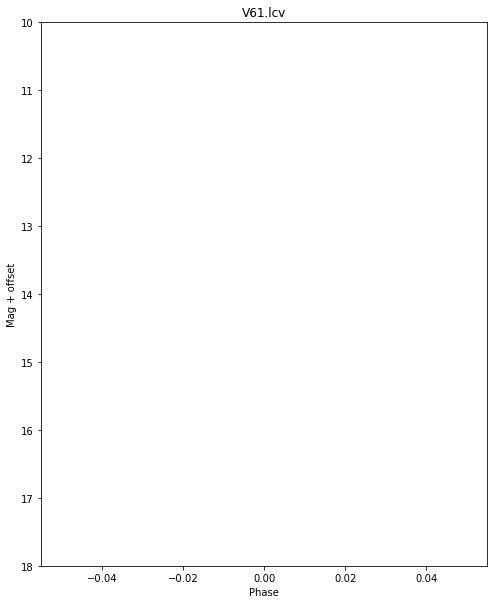

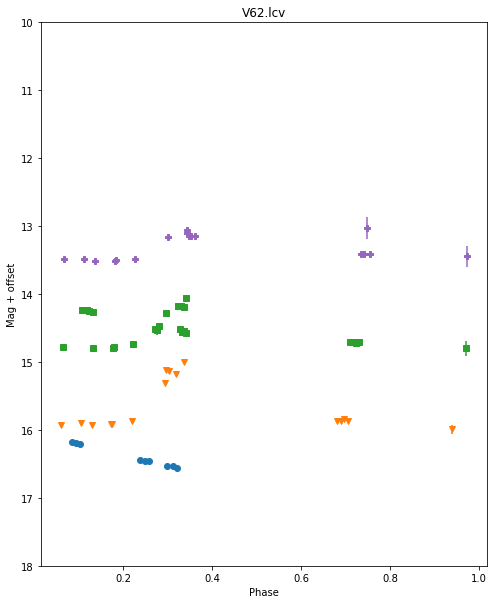

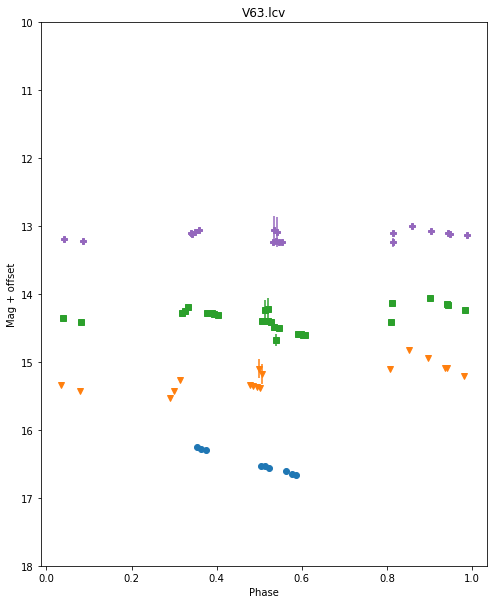

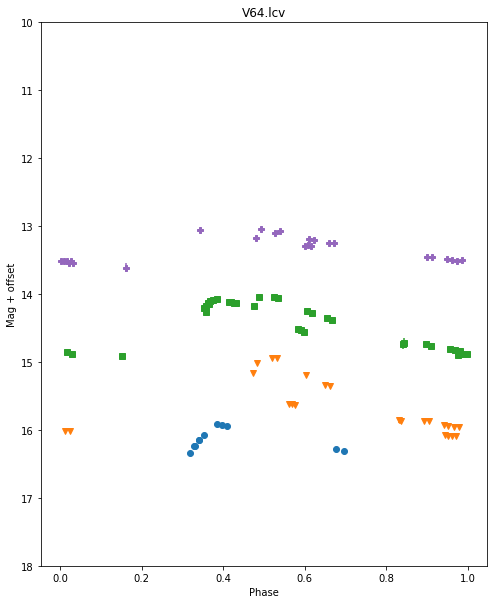

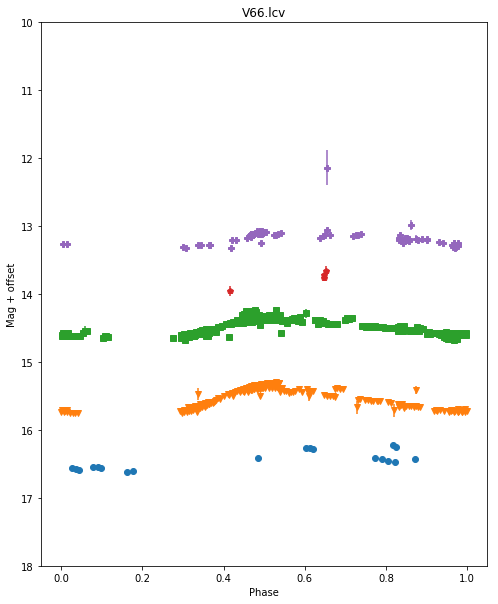

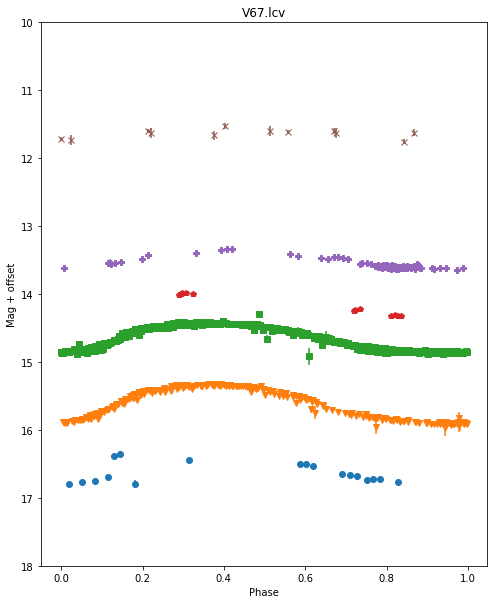

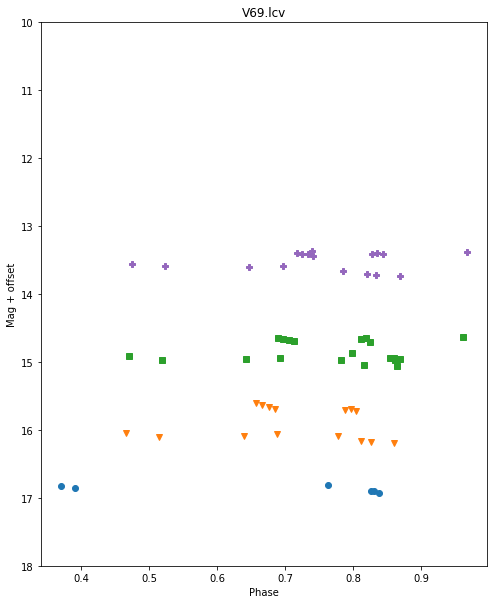

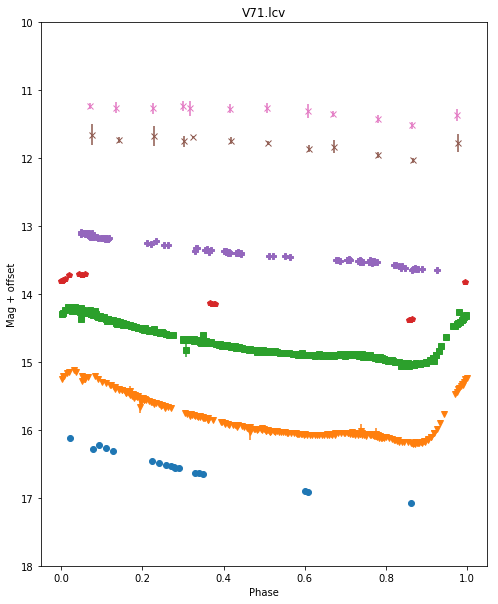

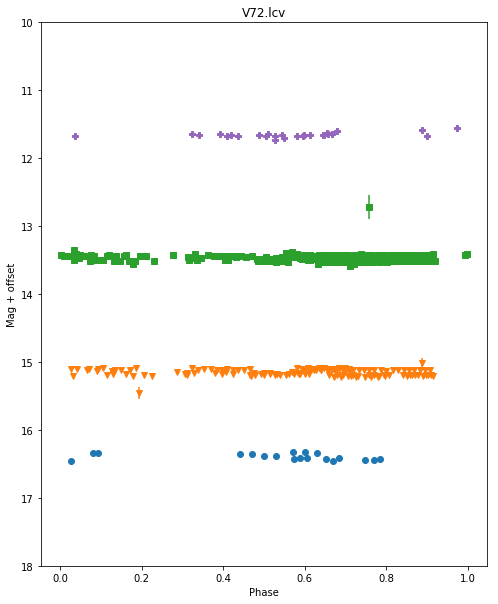

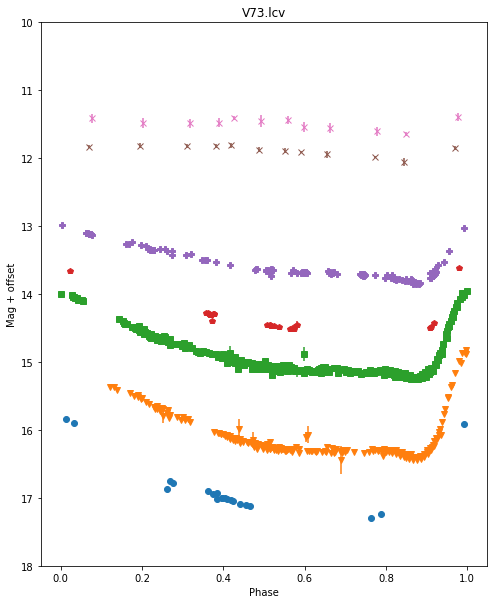

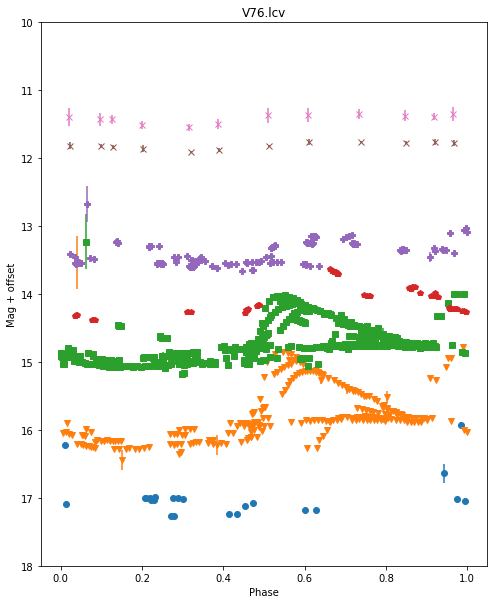

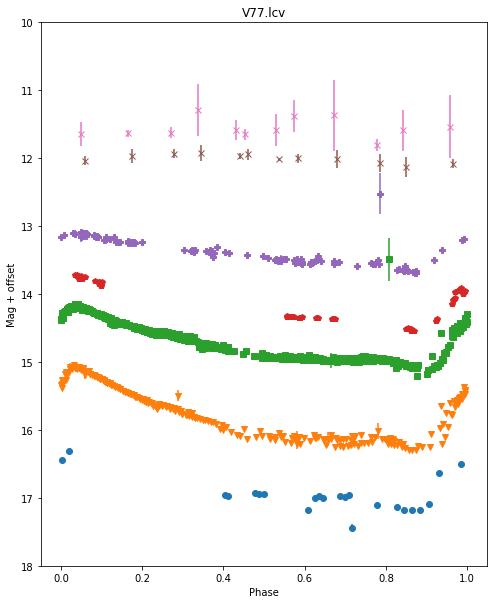

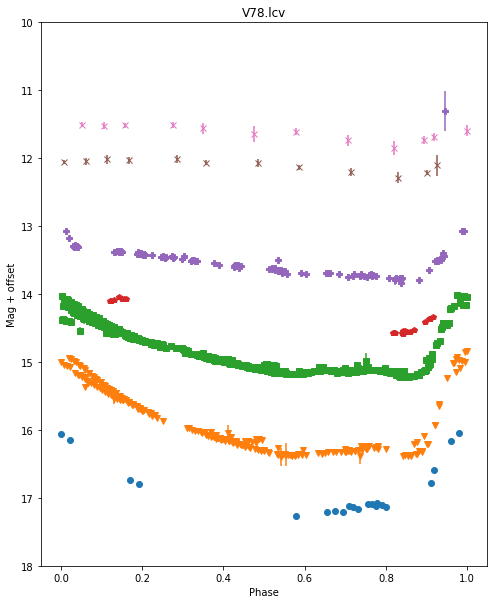

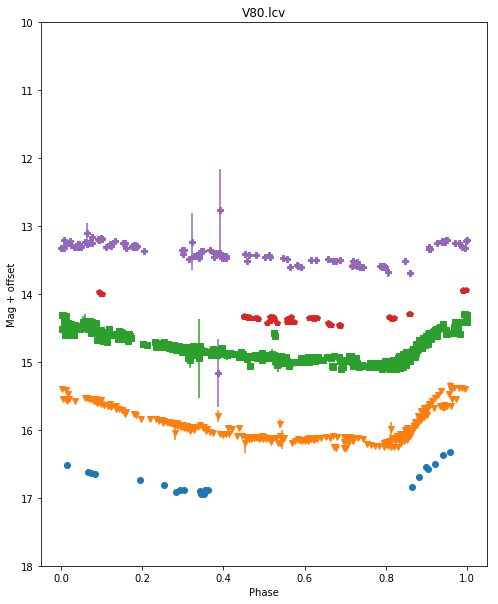

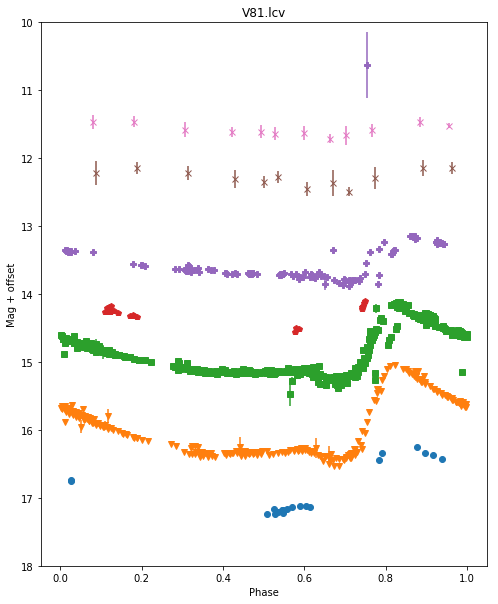

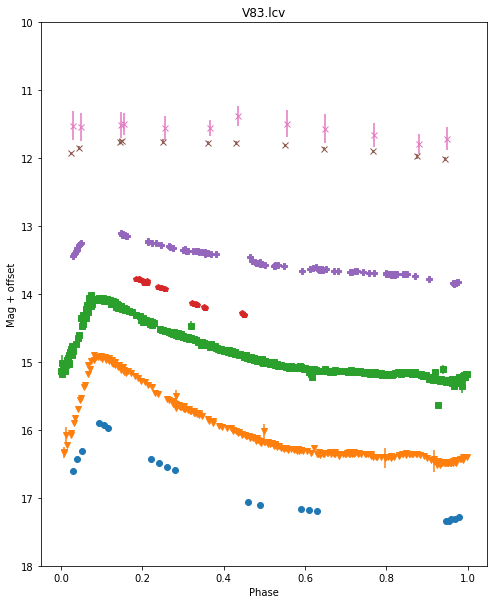

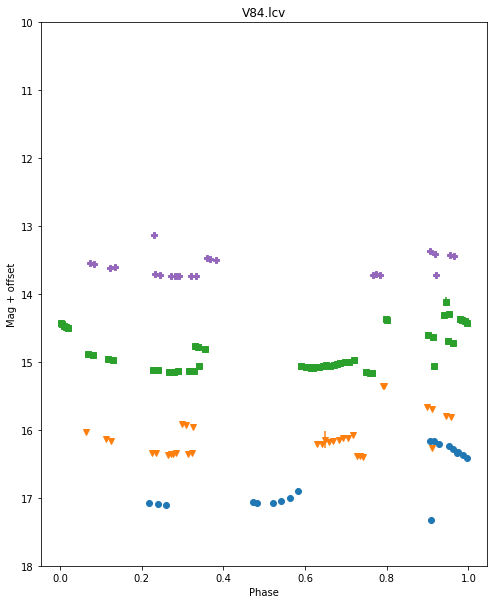

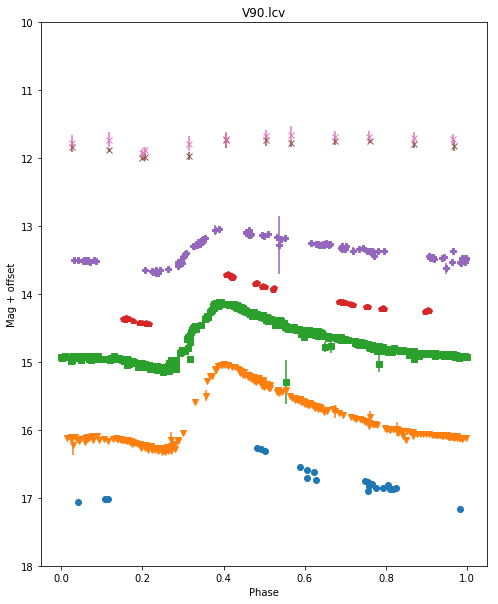

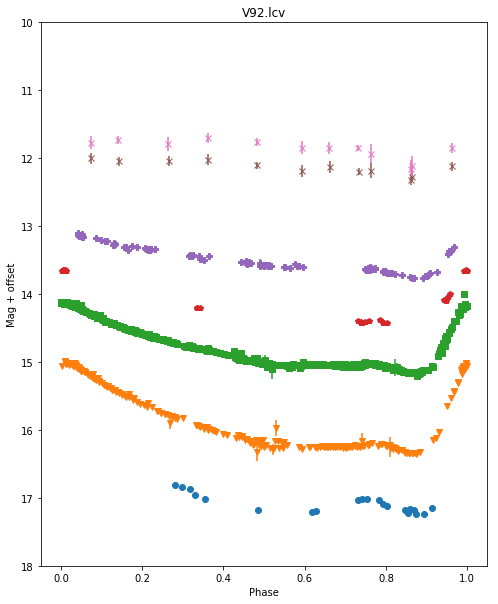

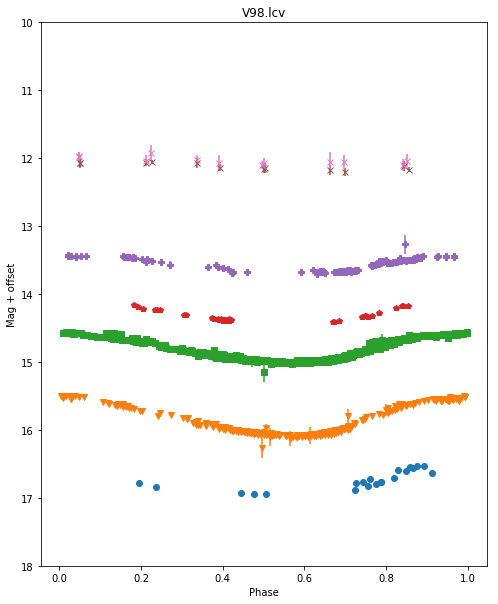

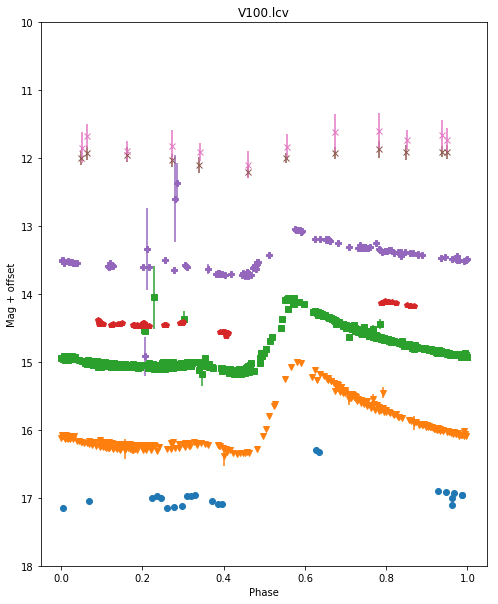

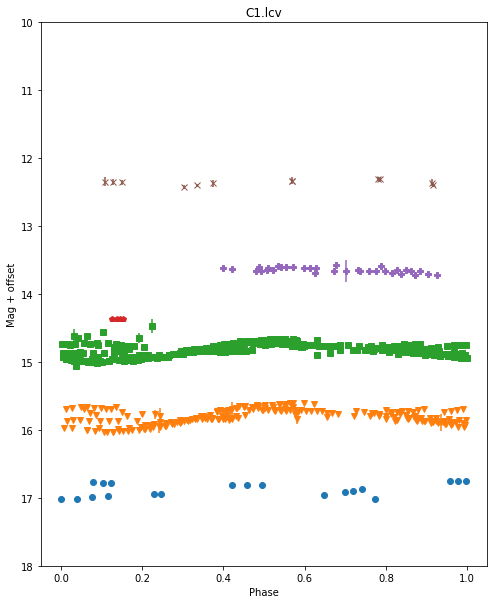

In [51]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder)
    except:
        print star, ' not found.'
        continue

## Fit light curves

/Volumes/Annie/CRRP/NGC3201/lcvs/V10.phased


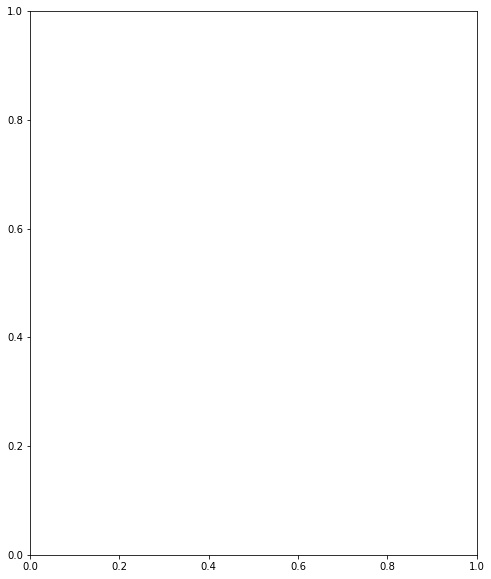

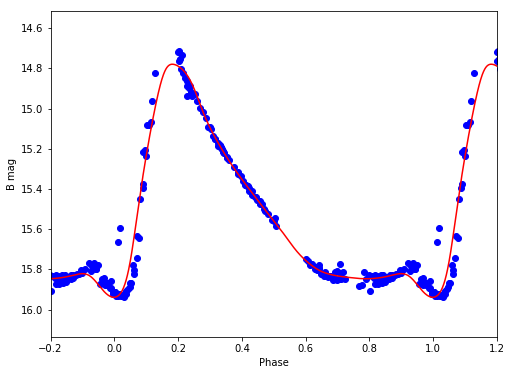

Are you happy with this fit? [y/n]: y
B 15.4545057697 1.15917052605


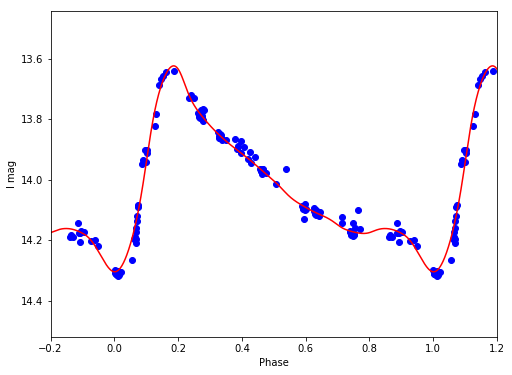

Are you happy with this fit? [y/n]: y
I 14.0046426095 0.679329755245


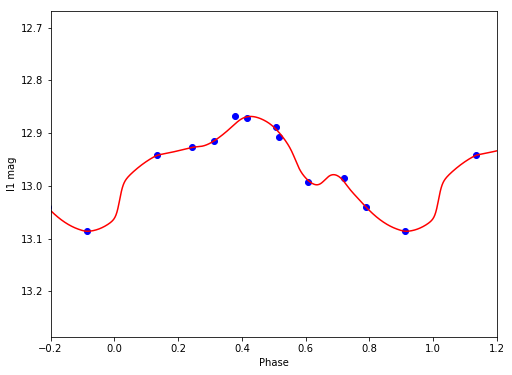

Are you happy with this fit? [y/n]: n
Enter new smoothing parameter: 0.2


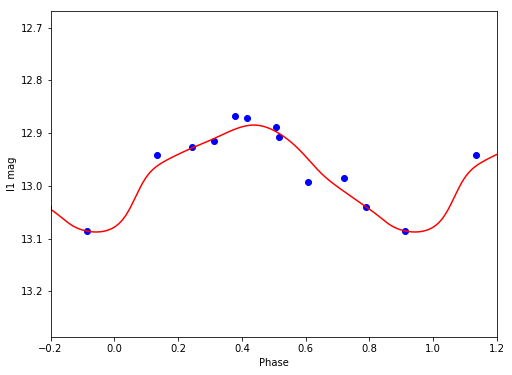

Are you happy with this fit? [y/n]: y
I1 12.9753945885 0.202649967201


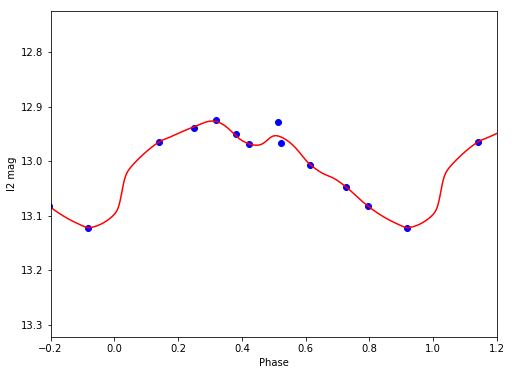

Are you happy with this fit? [y/n]: n
Enter new smoothing parameter: 0.2


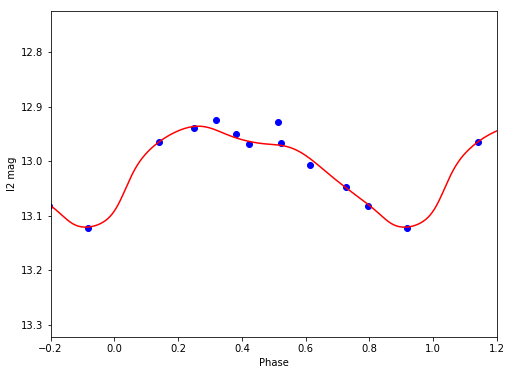

Are you happy with this fit? [y/n]: y
I2 13.0098955171 0.185092440405


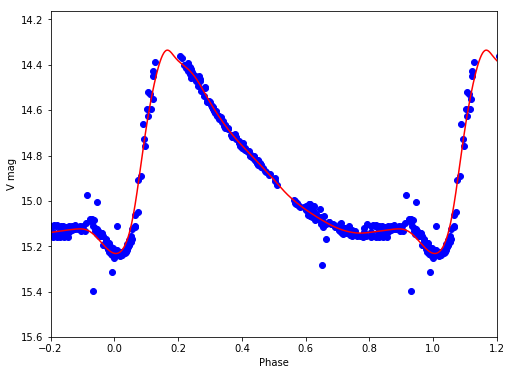

Are you happy with this fit? [y/n]: y
V 14.8556102376 0.895952769822
['U' 'B' 'V' 'R' 'I' 'J' 'H' 'K' 'I1' 'I2']
[         nan  15.45450577  14.85561024          nan  14.00464261   0.           0.
   0.          12.97539459  13.00989552]
[        nan  1.15917053  0.89595277         nan  0.67932976  0.          0.
  0.          0.20264997  0.18509244]
[ nan  0.1  0.1  nan  0.1  0.   0.   0.   0.2  0.2]


In [22]:
#f = open(folder+'avg_mags_test.txt', 'a')
star = 'V10'
#for ind, star in enumerate(stars):
    
r1, r2, r3, r4 = lightcurves.gloess(folder+'lcvs/'+star+'.phased', plot_save=1, clean=1)
#datasave = np.array(zip(np.repeat(star, len(r1)), r1, np.repeat(data['new_period'][ind], len(r1)), r2, r3, r4), dtype=[('c1', 'S3'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float)])
#np.savetxt(f, datasave, fmt='%3s %2s %10.8f %6.3f %4.2f %4.2f')
print r1
print r2
print r3
print r4
#f.close()